In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, roc_curve, auc,  precision_score, recall_score, f1_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Mount Google Drive to access the XLSX file (if it's stored on Drive)
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/Projekt.xlsx'
df = pd.read_excel(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,studentID,Test:Inicijalni test,Test:Blic-varijable i razgranata struktura,Test:Blic-petlje,Test:Blic-funkcije,Test:Blic-nizovi,Test:Blic-datoteke,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,...,Test:Test Zadaci s datotekama - problemi sa stringovima,Lekcija:Rekurzija,Testovi: Rekurzija,Test:Rekurzija - test1,Test:Rekurzija - test2,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Test:Otkrivanje i ispravljanje grešaka (debugging) - test1,Test:Otkrivanje i ispravljanje grešaka (debugging) - test2,Konačna ocjena
0,student001,0.8,0.7895,0.4,0.0000,0.5417,0.3182,0.6667,0.7822,0.3333,...,0.0,0,0.0,0.0,0.0,0,0,0,0,4.0
1,student002,0.5,0.0000,0.0,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0,0.0,0.0,0.0,0,0,0,0,1.0
2,student003,0.1,1.0000,0.8,0.7500,0.1875,0.1364,0.5000,0.7963,0.3333,...,0.0,0,0.0,0.0,0.0,0,0,0,0,1.0
3,student004,0.3,0.5789,0.4,0.4167,0.9583,0.7727,0.8333,0.8889,0.8333,...,0.0,0,0.0,0.0,0.0,0,0,0,0,4.0
4,student005,0.6,0.7105,0.7,0.0000,0.7396,0.0000,0.7500,0.9333,0.5000,...,0.0,0,0.0,0.0,0.0,0,0,0,0,2.0


In [5]:
df.shape

(169, 108)

In [6]:
# Define a lambda function to transform grades
transform_grade = lambda grade: "DA" if grade in [5, 4, 3, 2] else "NE"

# Create a new column with the transformed grades using Pandas' apply() method
df['Prošao'] = df['Konačna ocjena'].apply(transform_grade)


In [7]:
df.head()

,studentID,Test:Inicijalni test,Test:Blic-varijable i razgranata struktura,Test:Blic-petlje,Test:Blic-funkcije,Test:Blic-nizovi,Test:Blic-datoteke,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,...,Lekcija:Rekurzija,Testovi: Rekurzija,Test:Rekurzija - test1,Test:Rekurzija - test2,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Test:Otkrivanje i ispravljanje grešaka (debugging) - test1,Test:Otkrivanje i ispravljanje grešaka (debugging) - test2,Konačna ocjena,Prošao
0,student001,0.8,0.7895,0.4,0.0000,0.5417,0.3182,0.6667,0.7822,0.3333,...,0,0.0,0.0,0.0,0,0,0,0,4.0,DA
1,student002,0.5,0.0000,0.0,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0.0,0.0,0.0,0,0,0,0,1.0,NE
2,student003,0.1,1.0000,0.8,0.7500,0.1875,0.1364,0.5000,0.7963,0.3333,...,0,0.0,0.0,0.0,0,0,0,0,1.0,NE
3,student004,0.3,0.5789,0.4,0.4167,0.9583,0.7727,0.8333,0.8889,0.8333,...,0,0.0,0.0,0.0,0,0,0,0,4.0,DA
4,student005,0.6,0.7105,0.7,0.0000,0.7396,0.0000,0.7500,0.9333,0.5000,...,0,0.0,0.0,0.0,0,0,0,0,2.0,DA


In [8]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
transformed_grades = binarizer.fit_transform(df['Prošao'])
transformed_df = pd.DataFrame(transformed_grades)
df['Prošao']=transformed_df

In [9]:
df.head()

,studentID,Test:Inicijalni test,Test:Blic-varijable i razgranata struktura,Test:Blic-petlje,Test:Blic-funkcije,Test:Blic-nizovi,Test:Blic-datoteke,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,...,Lekcija:Rekurzija,Testovi: Rekurzija,Test:Rekurzija - test1,Test:Rekurzija - test2,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Test:Otkrivanje i ispravljanje grešaka (debugging) - test1,Test:Otkrivanje i ispravljanje grešaka (debugging) - test2,Konačna ocjena,Prošao
0,student001,0.8,0.7895,0.4,0.0000,0.5417,0.3182,0.6667,0.7822,0.3333,...,0,0.0,0.0,0.0,0,0,0,0,4.0,0
1,student002,0.5,0.0000,0.0,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0.0,0.0,0.0,0,0,0,0,1.0,1
2,student003,0.1,1.0000,0.8,0.7500,0.1875,0.1364,0.5000,0.7963,0.3333,...,0,0.0,0.0,0.0,0,0,0,0,1.0,1
3,student004,0.3,0.5789,0.4,0.4167,0.9583,0.7727,0.8333,0.8889,0.8333,...,0,0.0,0.0,0.0,0,0,0,0,4.0,0
4,student005,0.6,0.7105,0.7,0.0000,0.7396,0.0000,0.7500,0.9333,0.5000,...,0,0.0,0.0,0.0,0,0,0,0,2.0,0


In [10]:
df_other = pd.read_excel('/content/P12122 Ocjene - ISVU.xlsx')
dfs_dict = pd.read_excel('/content/P12122 Ocjene - ISVU.xlsx', sheet_name=['spol', 'spol'])

In [11]:
dfs_dict['spol'].head()

,Student_ID,Spol
0,student001,M
1,student002,M
2,student003,M
3,student004,F
4,student005,F


In [12]:
df['Spol'] = dfs_dict['spol'][['Spol']]


In [13]:
df.head()

,studentID,Test:Inicijalni test,Test:Blic-varijable i razgranata struktura,Test:Blic-petlje,Test:Blic-funkcije,Test:Blic-nizovi,Test:Blic-datoteke,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,...,Testovi: Rekurzija,Test:Rekurzija - test1,Test:Rekurzija - test2,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Test:Otkrivanje i ispravljanje grešaka (debugging) - test1,Test:Otkrivanje i ispravljanje grešaka (debugging) - test2,Konačna ocjena,Prošao,Spol
0,student001,0.8,0.7895,0.4,0.0000,0.5417,0.3182,0.6667,0.7822,0.3333,...,0.0,0.0,0.0,0,0,0,0,4.0,0,M
1,student002,0.5,0.0000,0.0,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0,0,0,0,1.0,1,M
2,student003,0.1,1.0000,0.8,0.7500,0.1875,0.1364,0.5000,0.7963,0.3333,...,0.0,0.0,0.0,0,0,0,0,1.0,1,M
3,student004,0.3,0.5789,0.4,0.4167,0.9583,0.7727,0.8333,0.8889,0.8333,...,0.0,0.0,0.0,0,0,0,0,4.0,0,F
4,student005,0.6,0.7105,0.7,0.0000,0.7396,0.0000,0.7500,0.9333,0.5000,...,0.0,0.0,0.0,0,0,0,0,2.0,0,F


In [14]:
prethodno_znanje = df.iloc[:, 1:6].mean(axis=1)

In [15]:
prethodno_znanje

0      0.50624
1      0.23334
2      0.56750
3      0.53078
4      0.55002
        ...   
164    0.00000
165    0.00000
166    0.16000
167    0.16000
168    0.00000
Length: 169, dtype: float64

In [16]:
df.head()

,studentID,Test:Inicijalni test,Test:Blic-varijable i razgranata struktura,Test:Blic-petlje,Test:Blic-funkcije,Test:Blic-nizovi,Test:Blic-datoteke,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,...,Testovi: Rekurzija,Test:Rekurzija - test1,Test:Rekurzija - test2,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Test:Otkrivanje i ispravljanje grešaka (debugging) - test1,Test:Otkrivanje i ispravljanje grešaka (debugging) - test2,Konačna ocjena,Prošao,Spol
0,student001,0.8,0.7895,0.4,0.0000,0.5417,0.3182,0.6667,0.7822,0.3333,...,0.0,0.0,0.0,0,0,0,0,4.0,0,M
1,student002,0.5,0.0000,0.0,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0,0,0,0,1.0,1,M
2,student003,0.1,1.0000,0.8,0.7500,0.1875,0.1364,0.5000,0.7963,0.3333,...,0.0,0.0,0.0,0,0,0,0,1.0,1,M
3,student004,0.3,0.5789,0.4,0.4167,0.9583,0.7727,0.8333,0.8889,0.8333,...,0.0,0.0,0.0,0,0,0,0,4.0,0,F
4,student005,0.6,0.7105,0.7,0.0000,0.7396,0.0000,0.7500,0.9333,0.5000,...,0.0,0.0,0.0,0,0,0,0,2.0,0,F


In [17]:
df.columns

Index(['studentID', 'Test:Inicijalni test ',
       'Test:Blic-varijable i razgranata struktura ', 'Test:Blic-petlje ',
       'Test:Blic-funkcije ', 'Test:Blic-nizovi ', 'Test:Blic-datoteke ',
       'Lekcija:Temeljni pojmovi iz programiranja ',
       'Test:Test Temeljni pojmovi iz programiranja ',
       'Lekcija:Elementi programskog jezika Python ',
       ...
       'Testovi: Rekurzija', 'Test:Rekurzija - test1',
       'Test:Rekurzija - test2',
       'Lekcija:Otkrivanje i ispravljanje grešaka - debugging',
       'Testovi:Otkrivanje i ispravljanje grešaka - debugging',
       'Test:Otkrivanje i ispravljanje grešaka (debugging) - test1',
       'Test:Otkrivanje i ispravljanje grešaka (debugging) - test2',
       'Konačna ocjena', 'Prošao', 'Spol'],
      dtype='object', length=110)

In [18]:
izbaciti = ['Test:Inicijalni test ', 'Test:Blic-varijable i razgranata struktura ', 'Test:Blic-petlje ', 'Test:Blic-funkcije ', 'Test:Blic-nizovi ', 'Test:Blic-datoteke ', 'Test:Test Elementi programskog jezika Python ', 'Test:Test Rad u Python IDLE okruženju - otvaranje datoteke, spremanje datoteke, testiranje programa ', 'Test:Test Operatori i izrazi - aritmetički ', 'Test:Test Operatori i izrazi - logički ', 'Test:Test Operatori i izrazi - relacijski ', 'Test:Test Operatori i izrazi - za stringove ', 'Lekcija:Infiksna i prefiksna notacija ', 'Lekcija:Prioritet i asocijativnost operatora ', 'Lekcija:Ekvivalentnost logičkih izraza ', 'Test:Test Varijable ', 'Test:Test Naredba za ispis - print ', 'Test:Test Naredba za unos - input ', 'Test:Test Linijska struktura ', 'Test:Test Razgranata struktura - jednostrana selekcija ', 'Test:Test Razgranata struktura - dvostrana selekcija ', 'Test:Test Razgranata struktura - višestruka selekcija ', 'Test:Test Osnovni algoritmi - problemi sa znamenkama (broj znamenki, ispis znamenki, suma znamenki, umnožak znamenki) ', 'Test:Test Osnovni algoritmi - problemi sa znamenkama (brojač određenih znamenki, najveća znamenka, najmanja znamenka, obrnuti ispis broja) ', 'Test:Test Osnovni algoritmi - problemi s djeliteljima broja (najveći zajednički djelitelj, najmanji zajednički višekratnik, broj djelitelja, suma djelitelja)', 'Test:Test Osnovni algoritmi - problemi s djeliteljima broja (produkt djelitelja, aritmetička sredina djelitelja, skraćivanje razlomka, prosti brojevi)', 'Test:Test Napredan rad sa stringovima - indeksiranje znakova stringa', 'Test:Test Napredan rad sa stringovima - selektiranje znakova stringa', 'Test:Rekurzija - test1', 'Test:Rekurzija - test2', 'Test:Otkrivanje i ispravljanje grešaka (debugging) - test1', 'Test:Otkrivanje i ispravljanje grešaka (debugging) - test2']
data = df.drop(izbaciti, axis=1)
data.head()

,studentID,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,Testovi: Elementi programskog jezika Python,Lekcija:Brojčani tip podataka,Test:Test Brojčani tip podataka,Lekcija:Tekstualni tip podataka,Test:Test Tekstualni tip podataka,Lekcija:Logički tip podataka,...,Test:Test Zadaci s datotekama - problemi sa djeliteljima broja,Lekcija:Zadaci s datotekama - problemi sa stringovima,Test:Test Zadaci s datotekama - problemi sa stringovima,Lekcija:Rekurzija,Testovi: Rekurzija,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Konačna ocjena,Prošao,Spol
0,student001,0.6667,0.7822,0.3333,0.6337,0.3333,0.8000,1.00,0.9111,0.8333,...,0.0,0,0.0,0,0.0,0,0,4.0,0,M
1,student002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0,0,0.0,0,0.0,0,0,1.0,1,M
2,student003,0.5000,0.7963,0.3333,0.5722,0.1667,0.6333,0.50,0.7111,0.3333,...,0.0,0,0.0,0,0.0,0,0,1.0,1,M
3,student004,0.8333,0.8889,0.8333,1.0000,0.6667,1.0000,0.75,0.9556,0.6667,...,0.0,0,0.0,0,0.0,0,0,4.0,0,F
4,student005,0.7500,0.9333,0.5000,0.6889,0.5000,0.5556,0.75,0.8681,0.6667,...,0.0,0,0.0,0,0.0,0,0,2.0,0,F


In [19]:
data['Prethodno znanje']=prethodno_znanje

In [20]:
import re
pattern = r'^Test|^Testovi'  # Regularni izraz za provjeru početka stupca s "Test" ili "Testovi"
odgovarajuci_stupci = [stupac for stupac in data.columns if re.match(pattern, stupac)]
data_odgovarajuci_stupci = data[odgovarajuci_stupci]

In [21]:
data_odgovarajuci_stupci['Broj_polozenih_testova']=data_odgovarajuci_stupci[data_odgovarajuci_stupci >= 0.5].count(axis=1)
data_odgovarajuci_stupci['Broj_nepolozenih_testova']=data_odgovarajuci_stupci[data_odgovarajuci_stupci < 0.5].count(axis=1)
data_odgovarajuci_stupci

<ipython-input-21-54503e908306>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_odgovarajuci_stupci['Broj_polozenih_testova']=data_odgovarajuci_stupci[data_odgovarajuci_stupci >= 0.5].count(axis=1)
<ipython-input-21-54503e908306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_odgovarajuci_stupci['Broj_nepolozenih_testova']=data_odgovarajuci_stupci[data_odgovarajuci_stupci < 0.5].count(axis=1)


,Test:Test Temeljni pojmovi iz programiranja,Testovi: Elementi programskog jezika Python,Test:Test Brojčani tip podataka,Test:Test Tekstualni tip podataka,Test:Test Logički tip podataka,"Testovi:Operatori i izrazi - aritmetički, logički, relacijski, za stringove","Test:Test Infiksna i prefiksna notacija, prioritet i asocijativnost operatora, ekvivalentnost logičkih izraza",Testovi: Varijable,"Test:Test Algoritam, svojstva algoritma, načini zapisivanja algoritma",Test:Test Primjer izrade algoritma,...,Test:Test Zadaci s listama - problemi s djeliteljima broja,Test:Test Zadaci s listama - problemi sa stringovima,Test:Test Podatkovne datoteke - osnovni algoritam za unos i čitanje podataka,Test:Test Zadaci s datotekama - Problemi sa znamenkama,Test:Test Zadaci s datotekama - problemi sa djeliteljima broja,Test:Test Zadaci s datotekama - problemi sa stringovima,Testovi: Rekurzija,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Broj_polozenih_testova,Broj_nepolozenih_testova
0,0.7822,0.6337,0.8000,0.9111,1.0000,0.817025,0.6444,0.567400,0.8296,0.7704,...,0.0,0.0,0.7556,0.0,0.0,0.0,0.0,0,24,13
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,0,38
2,0.7963,0.5722,0.6333,0.7111,0.6333,0.586200,0.7333,0.719267,0.7463,0.7556,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,14,23
3,0.8889,1.0000,1.0000,0.9556,1.0000,0.933325,1.0000,0.866667,1.0000,0.9111,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,17,20
4,0.9333,0.6889,0.5556,0.8681,0.5500,0.738875,0.8667,0.641467,0.7389,0.7778,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,0,38
165,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,0,38
166,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,0,38
167,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0,0,38


In [22]:
data['Broj_polozenih_testova']=data_odgovarajuci_stupci['Broj_polozenih_testova']
data['Broj_nepolozenih_testova']=data_odgovarajuci_stupci['Broj_nepolozenih_testova']
data.head()

,studentID,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,Testovi: Elementi programskog jezika Python,Lekcija:Brojčani tip podataka,Test:Test Brojčani tip podataka,Lekcija:Tekstualni tip podataka,Test:Test Tekstualni tip podataka,Lekcija:Logički tip podataka,...,Lekcija:Rekurzija,Testovi: Rekurzija,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Konačna ocjena,Prošao,Spol,Prethodno znanje,Broj_polozenih_testova,Broj_nepolozenih_testova
0,student001,0.6667,0.7822,0.3333,0.6337,0.3333,0.8000,1.00,0.9111,0.8333,...,0,0.0,0,0,4.0,0,M,0.50624,24,13
1,student002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0,0.0,0,0,1.0,1,M,0.23334,0,38
2,student003,0.5000,0.7963,0.3333,0.5722,0.1667,0.6333,0.50,0.7111,0.3333,...,0,0.0,0,0,1.0,1,M,0.56750,14,23
3,student004,0.8333,0.8889,0.8333,1.0000,0.6667,1.0000,0.75,0.9556,0.6667,...,0,0.0,0,0,4.0,0,F,0.53078,17,20
4,student005,0.7500,0.9333,0.5000,0.6889,0.5000,0.5556,0.75,0.8681,0.6667,...,0,0.0,0,0,2.0,0,F,0.55002,16,21


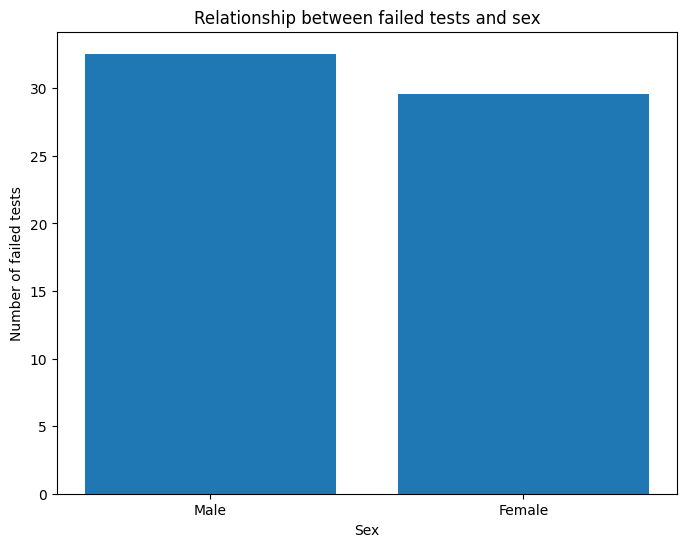

In [23]:
# Razdvajanje podataka po spolu
male_scores = data[data['Spol'] == 'M']['Broj_nepolozenih_testova']
female_scores = data[data['Spol'] == 'F']['Broj_nepolozenih_testova']

# Prikaz odnosa položenih testova po spolu
plt.figure(figsize=(8, 6))
plt.bar(['Male', 'Female'], [male_scores.mean(), female_scores.mean()])
plt.xlabel('Sex')
plt.ylabel('Number of failed tests')
plt.title('Relationship between failed tests and sex')
plt.show()


In [24]:
# Pronalaženje stupaca s lekcijama i njihovih odgovarajućih testova
lekcija_columns = [col for col in data.columns if col.startswith('Lekcija')]
test_columns = [col for col in data.columns if col.startswith('Test')]

In [25]:
lekcija_columns

['Lekcija:Temeljni pojmovi iz programiranja ',
 'Lekcija:Elementi programskog jezika Python ',
 'Lekcija:Brojčani tip podataka ',
 'Lekcija:Tekstualni tip podataka ',
 'Lekcija:Logički tip podataka ',
 'Lekcija:Operatori i izrazi - aritmetički, logički, relacijski, za stringove ',
 'Lekcija:Varijable ',
 'Lekcija:Algoritam ',
 'Lekcija:Primjer izrade algoritma ',
 'Lekcija:Jednostavne algoritamske strukture ',
 'Lekcija:Pojam cikličke strukture i vrste osnovnih struktura ',
 'Lekcija:Tipični primjeri povezivanja osnovnih cikličkih struktura u složenije ',
 'Lekcija:Osnovni algoritmi - problemi sa znamenkama ',
 'Lekcija:Osnovni algoritmi - problemi s djeliteljima broja',
 'Lekcija:Osnovni algoritmi - problemi sa stringovima',
 'Lekcija:Procedure',
 'Lekcija:Napredan rad sa stringovima',
 'Lekcija:Ugrađene funkcije',
 'Lekcija:Zadaci sa znamenkama',
 'Lekcija:Zadaci s djeliteljima broja',
 'Lekcija:Zadaci sa stringovima',
 'Lekcija:Liste - statički i dinamički unos, osnovni algoritmi',


In [26]:
test_columns

['Test:Test Temeljni pojmovi iz programiranja ',
 'Testovi: Elementi programskog jezika Python ',
 'Test:Test Brojčani tip podataka ',
 'Test:Test Tekstualni tip podataka ',
 'Test:Test Logički tip podataka ',
 'Testovi:Operatori i izrazi - aritmetički, logički, relacijski, za stringove ',
 'Test:Test Infiksna i prefiksna notacija, prioritet i asocijativnost operatora, ekvivalentnost logičkih izraza ',
 'Testovi: Varijable',
 'Test:Test Algoritam, svojstva algoritma, načini zapisivanja algoritma ',
 'Test:Test Primjer izrade algoritma ',
 'Testovi: Jednostavne algoritamske strukture ',
 'Test:Test Ciklička struktura - petlja s poznatim brojem ponavljanja ',
 'Test:Test Ciklička struktura - petlja s ispitivanjem uvjeta ',
 'Testovi: Osnovni algoritmi - problemi sa znamenkama ',
 'Testovi:Osnovni algoritmi - problemi s djeliteljima broja',
 'Test:Test Osnovni algoritmi - problemi sa stringovima (brojanje slova u stringu, brojanje riječi u rečenici, palindrom)',
 'Test:Test Procedure',
 '

In [27]:
print('Broj studenata: ',data.studentID.nunique())

Broj studenata:  169


In [28]:
data.head(5)

,studentID,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,Testovi: Elementi programskog jezika Python,Lekcija:Brojčani tip podataka,Test:Test Brojčani tip podataka,Lekcija:Tekstualni tip podataka,Test:Test Tekstualni tip podataka,Lekcija:Logički tip podataka,...,Lekcija:Rekurzija,Testovi: Rekurzija,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Konačna ocjena,Prošao,Spol,Prethodno znanje,Broj_polozenih_testova,Broj_nepolozenih_testova
0,student001,0.6667,0.7822,0.3333,0.6337,0.3333,0.8000,1.00,0.9111,0.8333,...,0,0.0,0,0,4.0,0,M,0.50624,24,13
1,student002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0,0.0,0,0,1.0,1,M,0.23334,0,38
2,student003,0.5000,0.7963,0.3333,0.5722,0.1667,0.6333,0.50,0.7111,0.3333,...,0,0.0,0,0,1.0,1,M,0.56750,14,23
3,student004,0.8333,0.8889,0.8333,1.0000,0.6667,1.0000,0.75,0.9556,0.6667,...,0,0.0,0,0,4.0,0,F,0.53078,17,20
4,student005,0.7500,0.9333,0.5000,0.6889,0.5000,0.5556,0.75,0.8681,0.6667,...,0,0.0,0,0,2.0,0,F,0.55002,16,21


In [29]:
data.columns

Index(['studentID', 'Lekcija:Temeljni pojmovi iz programiranja ',
       'Test:Test Temeljni pojmovi iz programiranja ',
       'Lekcija:Elementi programskog jezika Python ',
       'Testovi: Elementi programskog jezika Python ',
       'Lekcija:Brojčani tip podataka ', 'Test:Test Brojčani tip podataka ',
       'Lekcija:Tekstualni tip podataka ',
       'Test:Test Tekstualni tip podataka ', 'Lekcija:Logički tip podataka ',
       'Test:Test Logički tip podataka ',
       'Lekcija:Operatori i izrazi - aritmetički, logički, relacijski, za stringove ',
       'Testovi:Operatori i izrazi - aritmetički, logički, relacijski, za stringove ',
       'Lekcije: Infiksna i prefiksna notacija, prioritet i asocijativnost operatora, ekvivalentnost logičkih izraza ',
       'Test:Test Infiksna i prefiksna notacija, prioritet i asocijativnost operatora, ekvivalentnost logičkih izraza ',
       'Lekcija:Varijable ', 'Testovi: Varijable', 'Lekcija:Algoritam ',
       'Test:Test Algoritam, svojstva algo

Vizualizacija testovi - lekcije

In [30]:
average_scores = data.filter(like='Test')
average_scores = average_scores.mean()
average_scores1 = data.filter(like='Lekcij')
average_scores1 = average_scores1.mean()

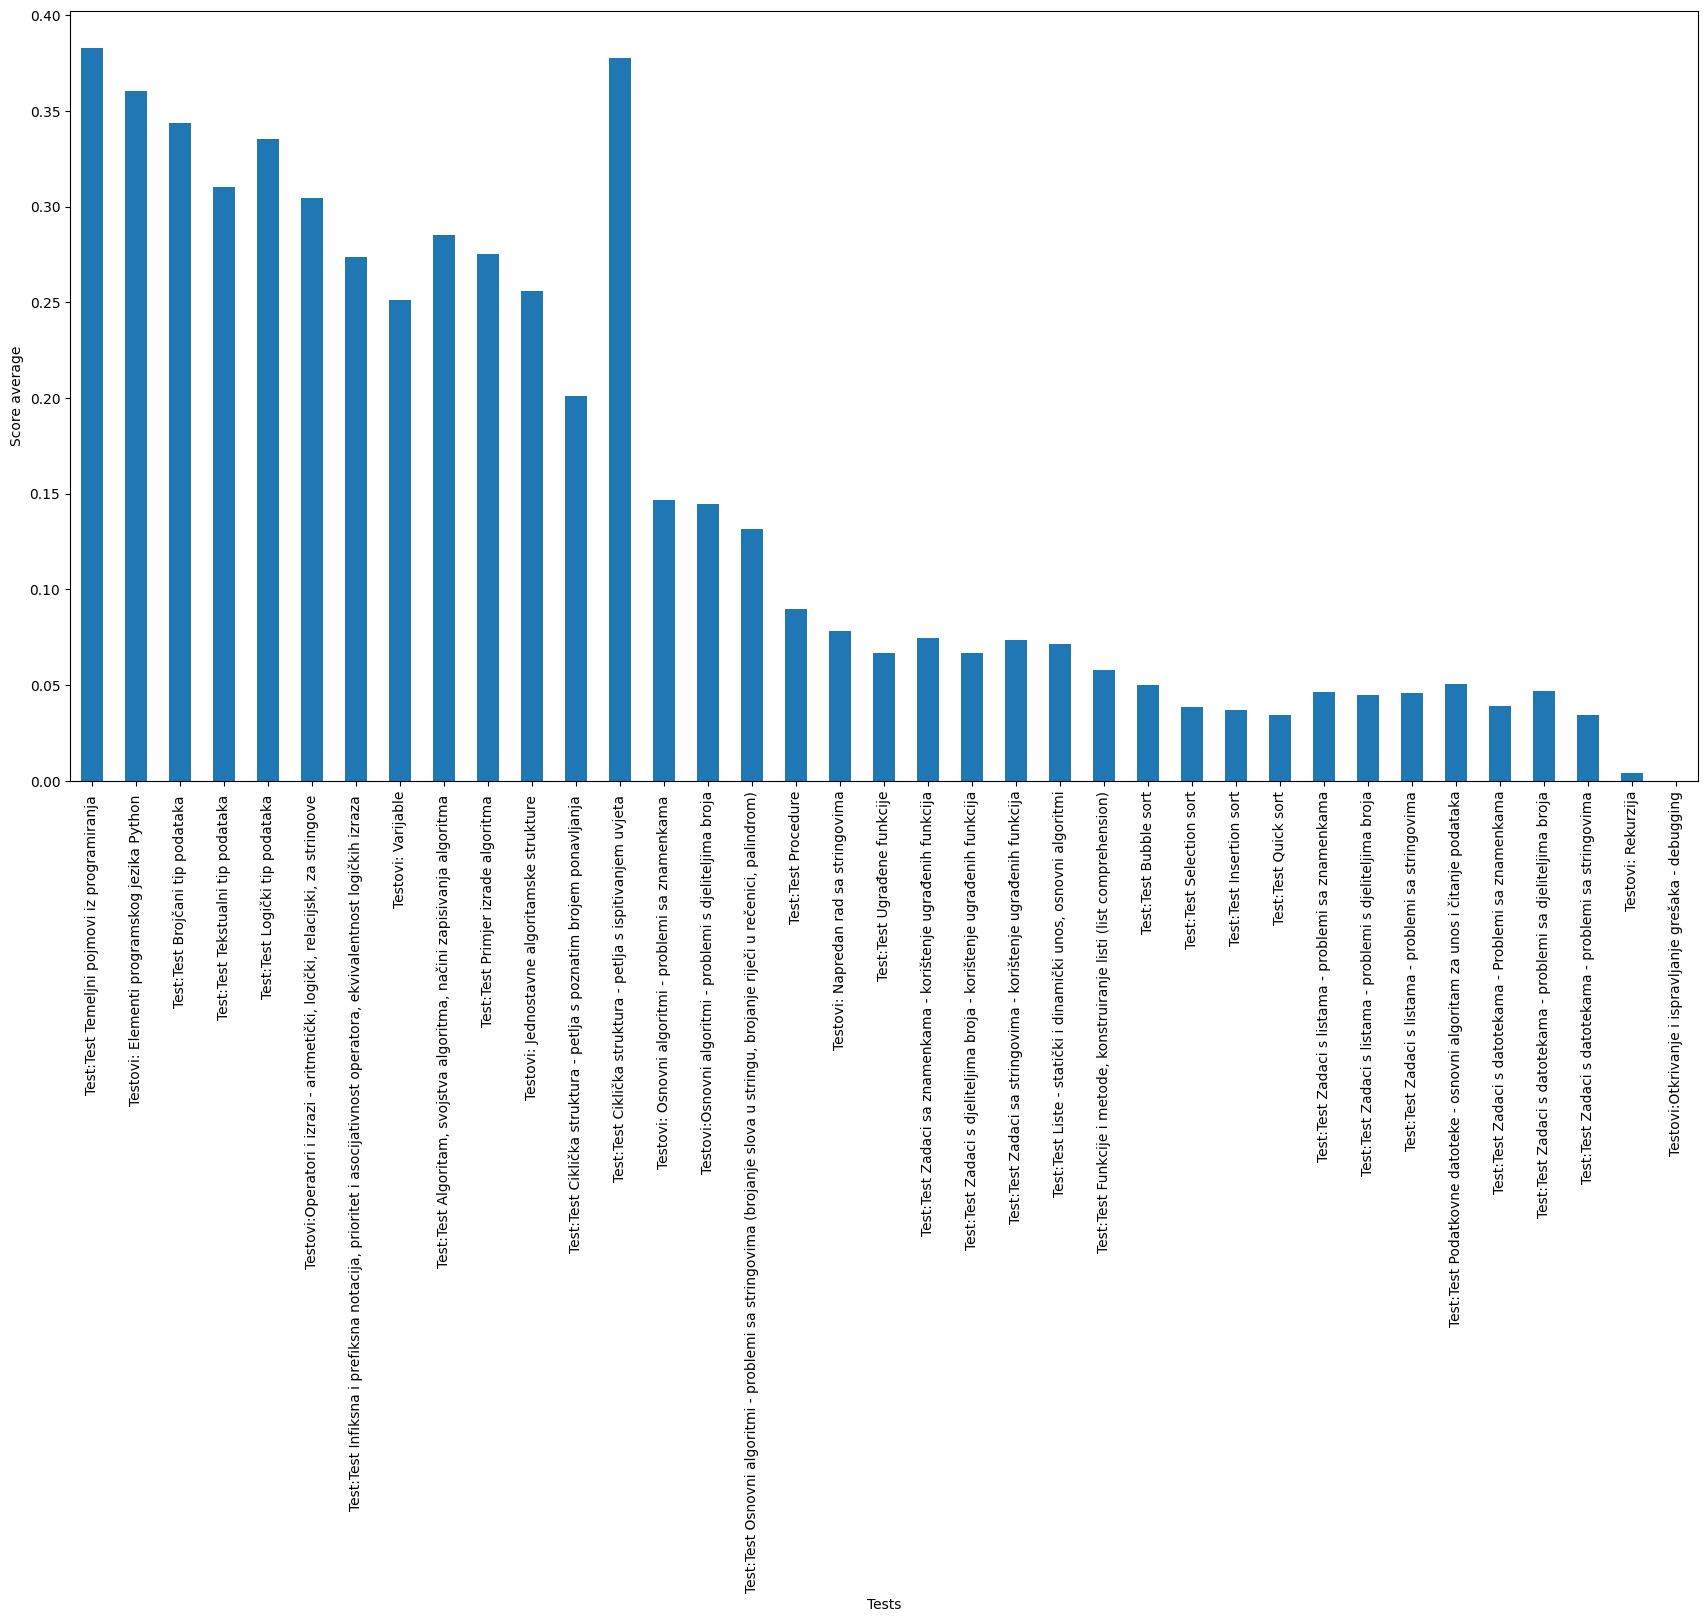

In [31]:
plt.figure(figsize=(21, 10))
average_scores.plot(kind='bar', xlabel='Tests', ylabel='Score average')
plt.show()

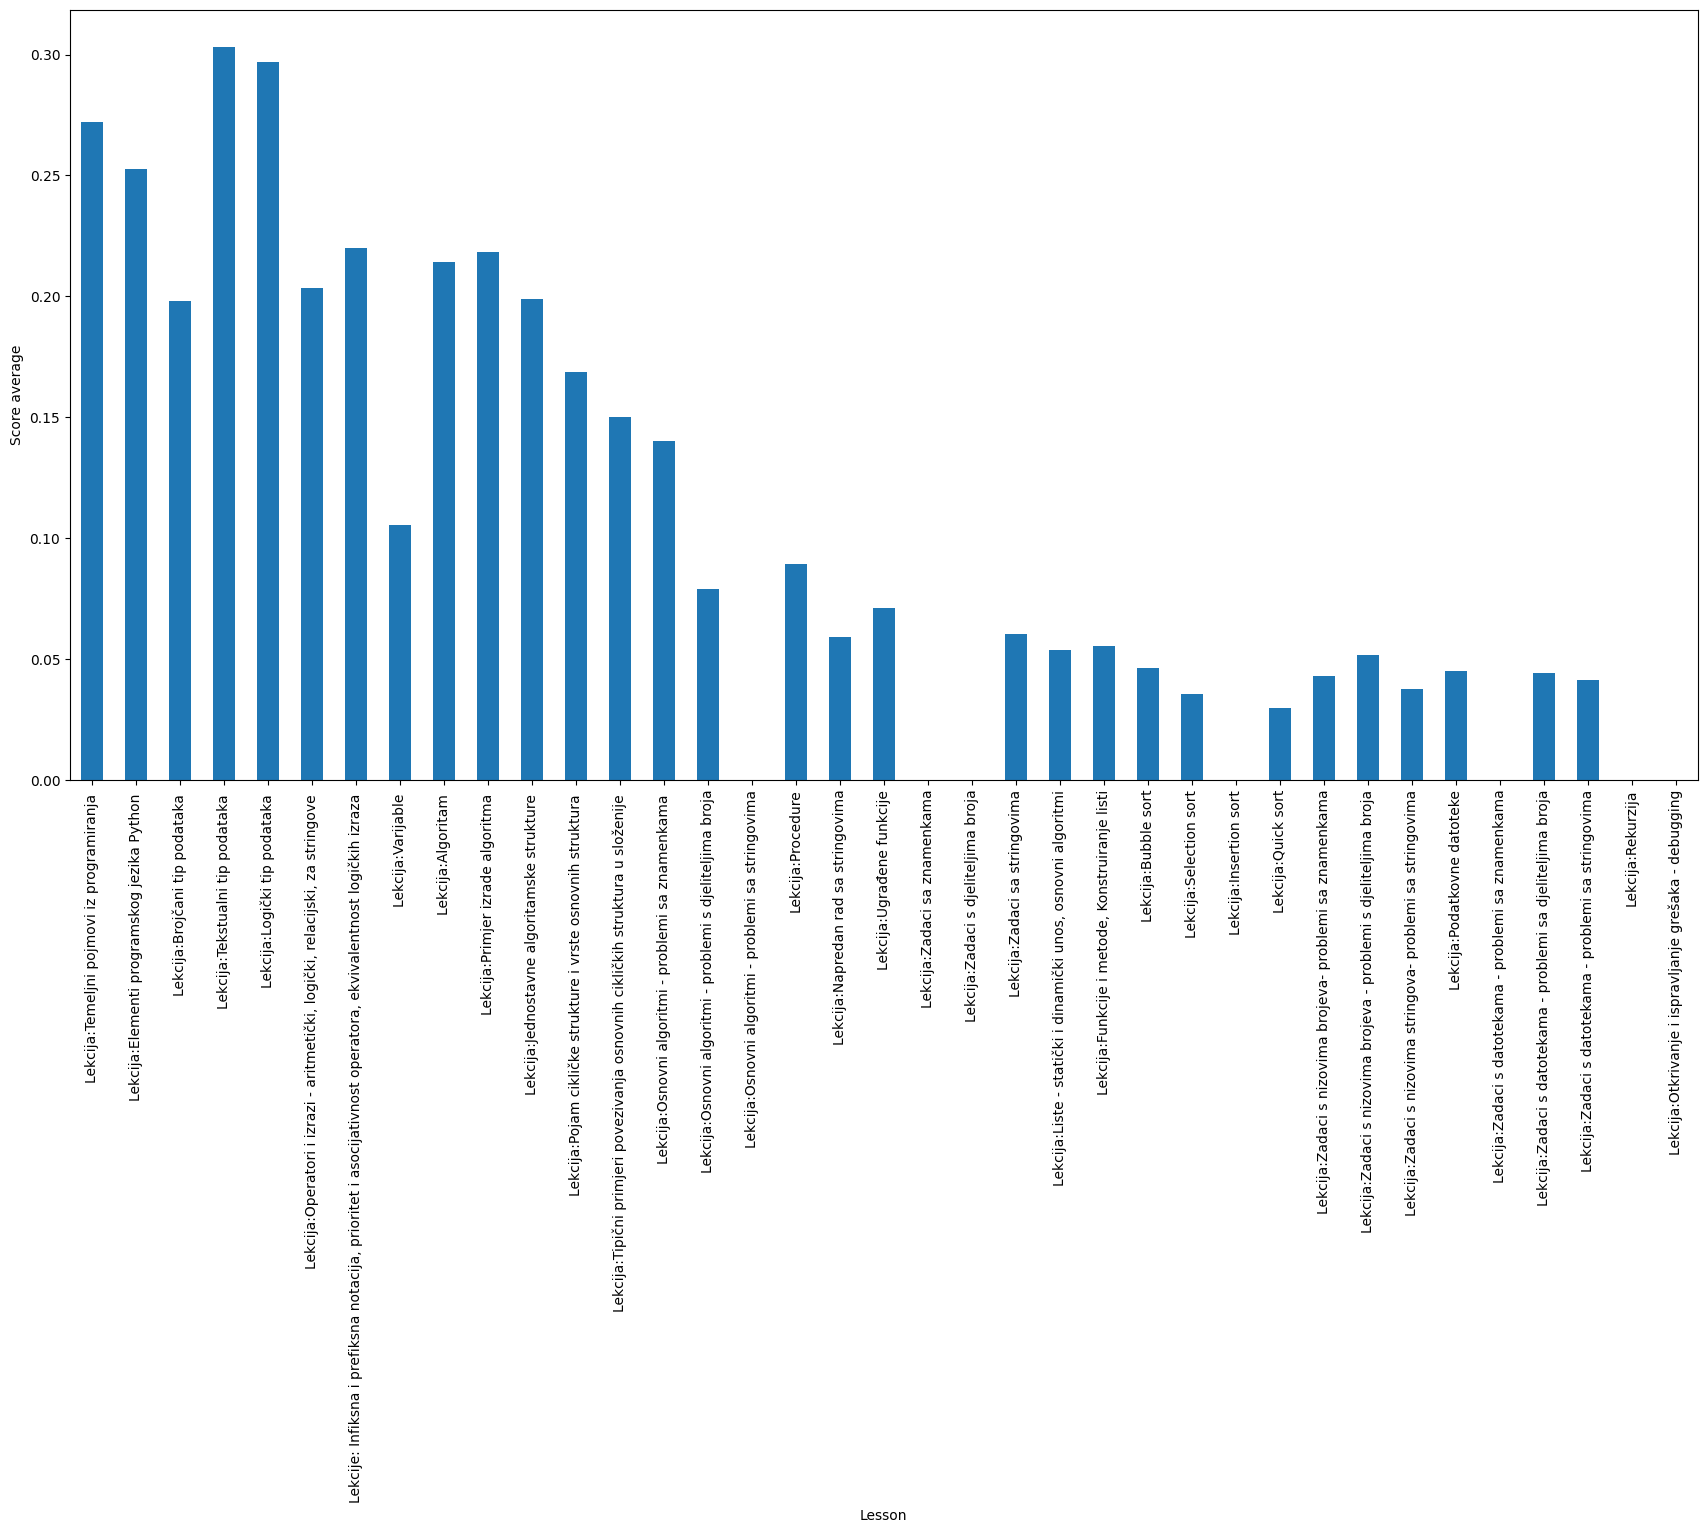

In [32]:
plt.figure(figsize=(21, 10))
average_scores1.plot(kind='bar', xlabel='Lesson', ylabel='Score average')
plt.show()

In [33]:
correlation_matrix = data.corr()

<ipython-input-33-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


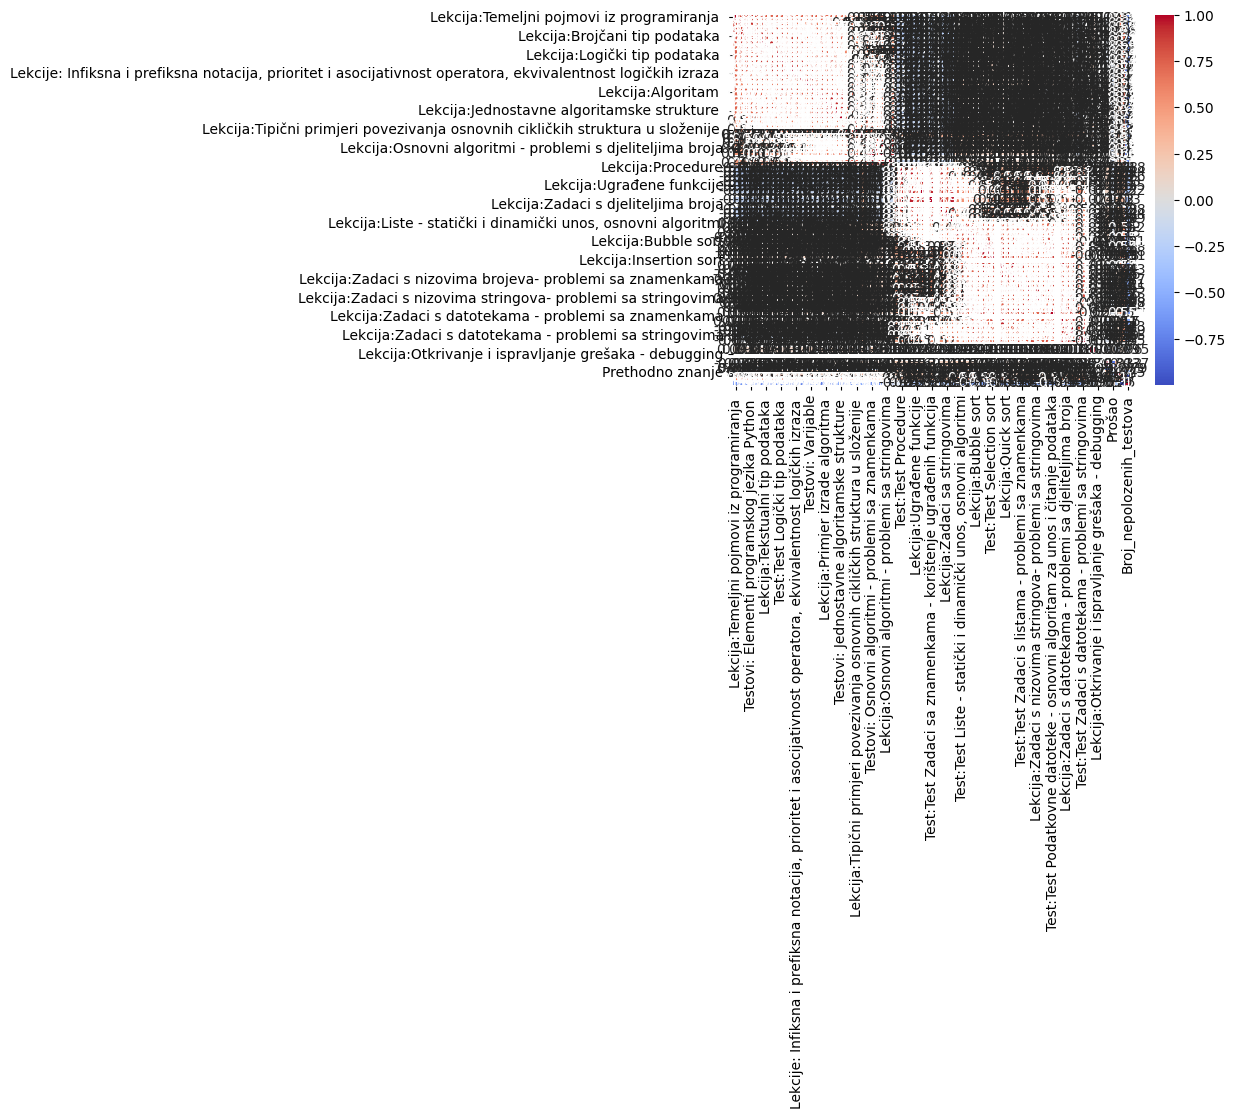

In [34]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [35]:
#pretvaranje matrice u seriju podataka i sortirati podatke prema vrijednosti korelacije
stacked_correlation = correlation_matrix.stack().reset_index()
sorted_correlation = stacked_correlation.sort_values(0, ascending=False)

Svaki redak u rezultirajućem okviru podataka predstavlja jedan par stupaca, a prvi stupac prikazuje vrijednost korelacije između tih dvaju stupaca.

In [36]:
#prvih 10 najviše povezanih vrijednosti
top_correlations = sorted_correlation.head(10)
print(top_correlations)

                                                level_0  \
0            Lekcija:Temeljni pojmovi iz programiranja    
1872  Lekcija:Osnovni algoritmi - problemi sa znamen...   
1440        Lekcija:Jednostavne algoritamske strukture    
1512       Testovi: Jednostavne algoritamske strukture    
1584  Lekcija:Pojam cikličke strukture i vrste osnov...   
1656  Test:Test Ciklička struktura - petlja s poznat...   
1728  Lekcija:Tipični primjeri povezivanja osnovnih ...   
1800  Test:Test Ciklička struktura - petlja s ispiti...   
1944  Testovi: Osnovni algoritmi - problemi sa zname...   
2592                        Test:Test Ugrađene funkcije   

                                                level_1    0  
0            Lekcija:Temeljni pojmovi iz programiranja   1.0  
1872  Lekcija:Osnovni algoritmi - problemi sa znamen...  1.0  
1440        Lekcija:Jednostavne algoritamske strukture   1.0  
1512       Testovi: Jednostavne algoritamske strukture   1.0  
1584  Lekcija:Pojam cikličke strukt

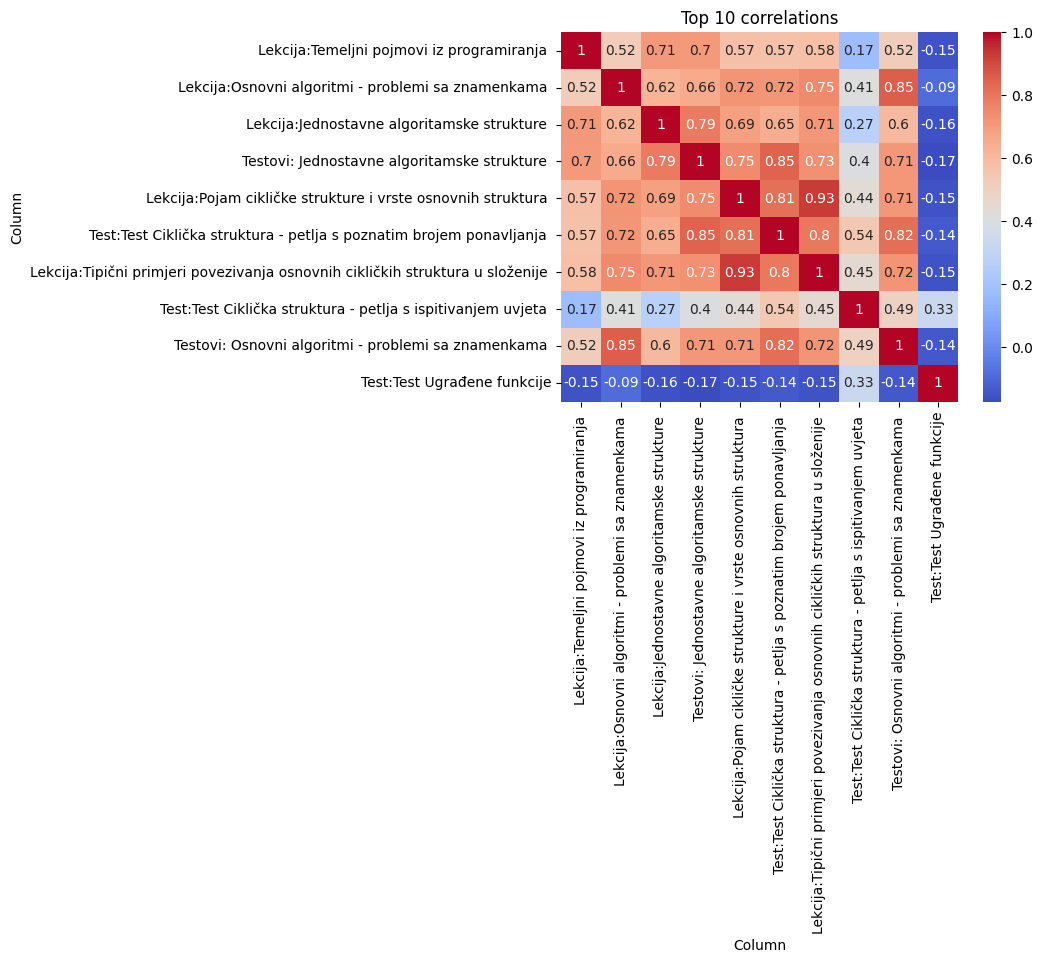

In [37]:
top_correlations = sorted_correlation.head(10)
top_correlation_matrix = correlation_matrix.loc[top_correlations['level_0'], top_correlations['level_1']]

sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Top 10 correlations')
plt.show()

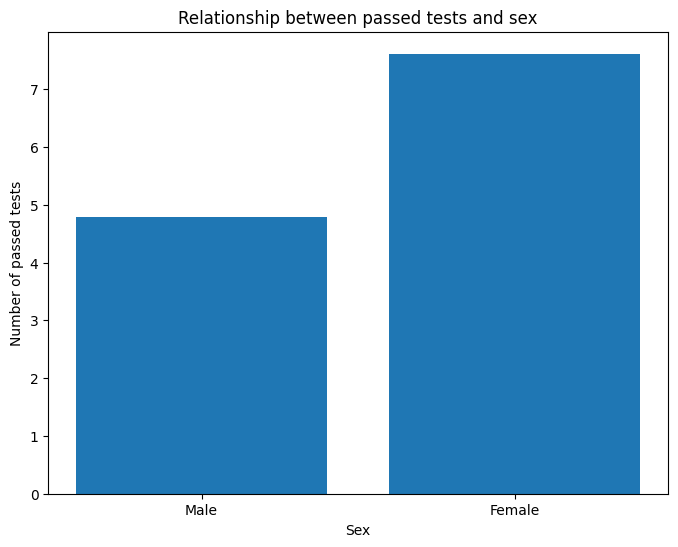

In [38]:
# Razdvajanje podataka po spolu
male_scores = data[data['Spol'] == 'M']['Broj_polozenih_testova']
female_scores = data[data['Spol'] == 'F']['Broj_polozenih_testova']

# Prikaz odnosa položenih testova po spolu
plt.figure(figsize=(8, 6))
plt.bar(['Male', 'Female'], [male_scores.mean(), female_scores.mean()])
plt.xlabel('Sex')
plt.ylabel('Number of passed tests')
plt.title('Relationship between passed tests and sex')
plt.show()


In [39]:
# Grupiranje po spolu i izračunavanje broja položenih testova
polozeni_testovi = data.groupby('Spol')['Broj_polozenih_testova'].sum()

# Ispis broja položenih testova po spolu
print(polozeni_testovi)


Spol
F    731
M    350
Name: Broj_polozenih_testova, dtype: int64


In [40]:
ukupno_polozeni=data['Broj_polozenih_testova'].sum()
ukupno_polozeni

1081

In [41]:
ukupno_nepolozeni=data['Broj_nepolozenih_testova'].sum()
ukupno_nepolozeni

5220

In [42]:
# Grupiranje po spolu i izračunavanje broja nepoloženih testova
nepolozeni_testovi = data.groupby('Spol')['Broj_nepolozenih_testova'].sum()

# Ispis broja nepoloženih testova po spolu
print(nepolozeni_testovi)

Spol
F    2843
M    2377
Name: Broj_nepolozenih_testova, dtype: int64


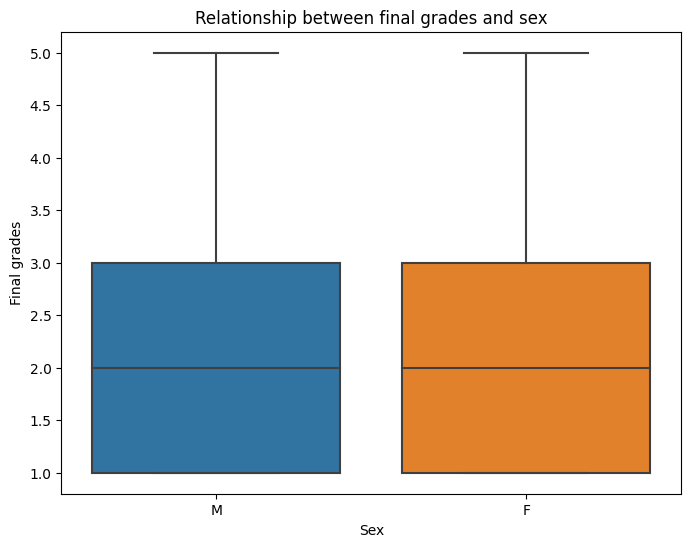

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Spol', y='Konačna ocjena', data=data)
plt.xlabel('Sex')
plt.ylabel('Final grades')
plt.title('Relationship between final grades and sex')
plt.show()

In [44]:
data.head()

,studentID,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,Testovi: Elementi programskog jezika Python,Lekcija:Brojčani tip podataka,Test:Test Brojčani tip podataka,Lekcija:Tekstualni tip podataka,Test:Test Tekstualni tip podataka,Lekcija:Logički tip podataka,...,Lekcija:Rekurzija,Testovi: Rekurzija,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Konačna ocjena,Prošao,Spol,Prethodno znanje,Broj_polozenih_testova,Broj_nepolozenih_testova
0,student001,0.6667,0.7822,0.3333,0.6337,0.3333,0.8000,1.00,0.9111,0.8333,...,0,0.0,0,0,4.0,0,M,0.50624,24,13
1,student002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0,0.0,0,0,1.0,1,M,0.23334,0,38
2,student003,0.5000,0.7963,0.3333,0.5722,0.1667,0.6333,0.50,0.7111,0.3333,...,0,0.0,0,0,1.0,1,M,0.56750,14,23
3,student004,0.8333,0.8889,0.8333,1.0000,0.6667,1.0000,0.75,0.9556,0.6667,...,0,0.0,0,0,4.0,0,F,0.53078,17,20
4,student005,0.7500,0.9333,0.5000,0.6889,0.5000,0.5556,0.75,0.8681,0.6667,...,0,0.0,0,0,2.0,0,F,0.55002,16,21


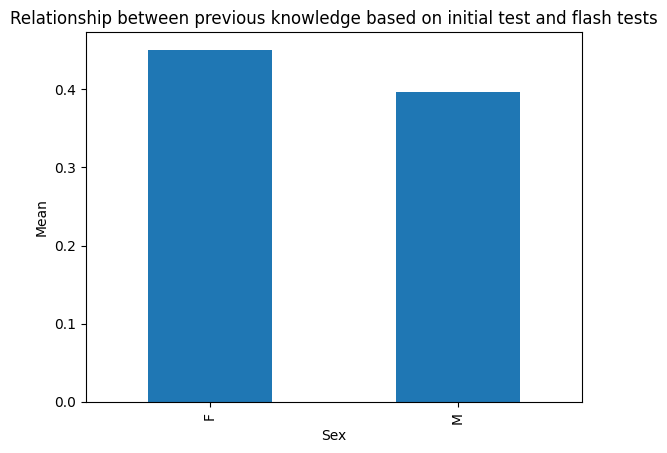

In [45]:
grouped = data.groupby('Spol')['Prethodno znanje'].mean()
grouped.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Mean')
plt.title('Relationship between previous knowledge based on initial test and flash tests')
plt.show()


Export dataframea-a u CSV

In [46]:
data.to_csv('projekt.csv', index=False, sep=';')

In [47]:
from google.colab import files
files.download('projekt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**STROJNO** **UČENJE**

In [48]:
data.corr()

<ipython-input-48-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,Testovi: Elementi programskog jezika Python,Lekcija:Brojčani tip podataka,Test:Test Brojčani tip podataka,Lekcija:Tekstualni tip podataka,Test:Test Tekstualni tip podataka,Lekcija:Logički tip podataka,Test:Test Logički tip podataka,...,Test:Test Zadaci s datotekama - problemi sa stringovima,Lekcija:Rekurzija,Testovi: Rekurzija,Lekcija:Otkrivanje i ispravljanje grešaka - debugging,Testovi:Otkrivanje i ispravljanje grešaka - debugging,Konačna ocjena,Prošao,Prethodno znanje,Broj_polozenih_testova,Broj_nepolozenih_testova
Lekcija:Temeljni pojmovi iz programiranja,1.000000,0.817570,0.819157,0.859741,0.806251,0.793123,0.737469,0.741605,0.764601,0.764836,...,-0.036538,NaN,0.091093,NaN,NaN,-0.035502,0.019156,0.101723,0.632228,-0.638813
Test:Test Temeljni pojmovi iz programiranja,0.817570,1.000000,0.798807,0.901691,0.735628,0.876445,0.737121,0.838264,0.738476,0.823043,...,-0.049441,NaN,0.091917,NaN,NaN,-0.035186,0.007105,0.100546,0.643967,-0.656252
Lekcija:Elementi programskog jezika Python,0.819157,0.798807,1.000000,0.808906,0.841842,0.756166,0.862904,0.735877,0.798820,0.759055,...,-0.040221,NaN,0.104299,NaN,NaN,-0.015533,-0.027533,0.082166,0.617702,-0.624259
Testovi: Elementi programskog jezika Python,0.859741,0.901691,0.808906,1.000000,0.803061,0.891194,0.767737,0.878113,0.750940,0.858128,...,-0.041400,NaN,0.081246,NaN,NaN,-0.013519,-0.014159,0.095430,0.689290,-0.698777
Lekcija:Brojčani tip podataka,0.806251,0.735628,0.841842,0.803061,1.000000,0.765187,0.856478,0.759659,0.829324,0.784343,...,-0.005749,NaN,0.084129,NaN,NaN,0.055818,-0.115013,0.175233,0.676246,-0.677962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Konačna ocjena,-0.035502,-0.035186,-0.015533,-0.013519,0.055818,-0.052711,-0.033488,-0.041043,-0.047628,-0.040827,...,-0.064461,NaN,-0.070581,NaN,NaN,1.000000,-0.783789,0.311837,0.032044,-0.037105
Prošao,0.019156,0.007105,-0.027533,-0.014159,-0.115013,0.016236,-0.039271,0.008683,-0.014191,0.002293,...,-0.029117,NaN,0.087416,NaN,NaN,-0.783789,1.000000,-0.273895,-0.073016,0.078519
Prethodno znanje,0.101723,0.100546,0.082166,0.095430,0.175233,0.124369,0.104393,0.139633,0.129421,0.123112,...,0.113318,NaN,-0.073117,NaN,NaN,0.311837,-0.273895,1.000000,0.239146,-0.249295
Broj_polozenih_testova,0.632228,0.643967,0.617702,0.689290,0.676246,0.717318,0.665996,0.734202,0.647428,0.743810,...,0.454834,NaN,0.095983,NaN,NaN,0.032044,-0.073016,0.239146,1.000000,-0.998699


In [49]:
uncorrelated_variables = []
for column in correlation_matrix.columns:
    if correlation_matrix[column].sum() == 0:
        uncorrelated_variables.append(column)

In [50]:
uncorrelated_variables

['Lekcija:Osnovni algoritmi - problemi sa stringovima',
 'Lekcija:Zadaci sa znamenkama',
 'Lekcija:Zadaci s djeliteljima broja',
 'Lekcija:Insertion sort',
 'Lekcija:Zadaci s datotekama - problemi sa znamenkama',
 'Lekcija:Rekurzija',
 'Lekcija:Otkrivanje i ispravljanje grešaka - debugging',
 'Testovi:Otkrivanje i ispravljanje grešaka - debugging']

In [51]:
data = data.drop(uncorrelated_variables, axis=1)

In [52]:
data.head()

,studentID,Lekcija:Temeljni pojmovi iz programiranja,Test:Test Temeljni pojmovi iz programiranja,Lekcija:Elementi programskog jezika Python,Testovi: Elementi programskog jezika Python,Lekcija:Brojčani tip podataka,Test:Test Brojčani tip podataka,Lekcija:Tekstualni tip podataka,Test:Test Tekstualni tip podataka,Lekcija:Logički tip podataka,...,Test:Test Zadaci s datotekama - problemi sa djeliteljima broja,Lekcija:Zadaci s datotekama - problemi sa stringovima,Test:Test Zadaci s datotekama - problemi sa stringovima,Testovi: Rekurzija,Konačna ocjena,Prošao,Spol,Prethodno znanje,Broj_polozenih_testova,Broj_nepolozenih_testova
0,student001,0.6667,0.7822,0.3333,0.6337,0.3333,0.8000,1.00,0.9111,0.8333,...,0.0,0,0.0,0.0,4.0,0,M,0.50624,24,13
1,student002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0,0,0.0,0.0,1.0,1,M,0.23334,0,38
2,student003,0.5000,0.7963,0.3333,0.5722,0.1667,0.6333,0.50,0.7111,0.3333,...,0.0,0,0.0,0.0,1.0,1,M,0.56750,14,23
3,student004,0.8333,0.8889,0.8333,1.0000,0.6667,1.0000,0.75,0.9556,0.6667,...,0.0,0,0.0,0.0,4.0,0,F,0.53078,17,20
4,student005,0.7500,0.9333,0.5000,0.6889,0.5000,0.5556,0.75,0.8681,0.6667,...,0.0,0,0.0,0.0,2.0,0,F,0.55002,16,21


In [53]:
label_encoder = LabelEncoder()
data['Spol'] = label_encoder.fit_transform(data['Spol'])

In [54]:
data=data.drop('Konačna ocjena',axis=1)
dataY=data['Prošao']
data=data.drop('Prošao',axis=1)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(data,dataY,test_size=0.2,random_state=17)

In [56]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (135, 71)
X_test (34, 71)
y_train (135,)
y_test (34,)


In [57]:
X_train = X_train.drop('studentID', axis=1)
X_test = X_test.drop('studentID', axis=1)


In [58]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [59]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[4.94200381e-01 1.94571514e-01 5.60154111e-02 4.58096375e-02
 2.63885068e-02 2.54993248e-02 1.71809619e-02 1.52493670e-02
 1.20519326e-02 1.04527110e-02 9.67731768e-03 8.87158984e-03
 7.63327611e-03 6.39596248e-03 5.99977288e-03 5.16635480e-03
 4.70945897e-03 4.33006181e-03 4.04208514e-03 3.83271781e-03
 3.69125769e-03 3.11818415e-03 2.81495582e-03 2.71113993e-03
 2.34248050e-03 2.26740921e-03 2.13636877e-03 2.02816145e-03
 2.00621682e-03 1.63072111e-03 1.59166923e-03 1.36635056e-03
 1.31384381e-03 1.26324471e-03 1.10580877e-03 1.07070115e-03
 1.02007433e-03 9.95217290e-04 9.08681264e-04 8.16873858e-04
 7.85777355e-04 6.50967275e-04 6.41718578e-04 5.39176753e-04
 4.76695253e-04 4.14317829e-04 3.74345620e-04 3.40229167e-04
 2.94350099e-04 2.73655946e-04 2.40448191e-04 1.71568516e-04
 1.35667366e-04 1.12813066e-04 8.72049691e-05 7.32783669e-05
 5.23188793e-05 4.17591393e-05 1.18120684e-05 2.34039491e-06
 1.84960539e-06 3.21049033e-33 3.21049033e-33 3.21049033e-33
 3.21049033e-33 3.210490

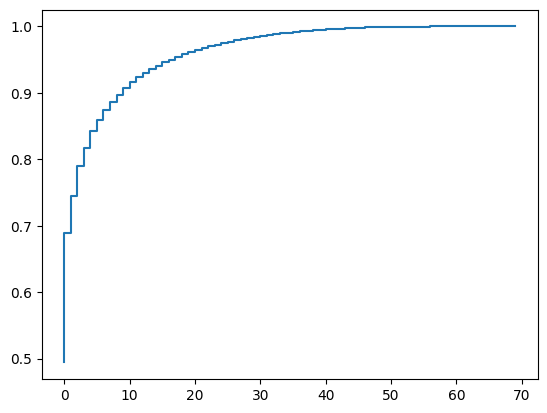

In [60]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

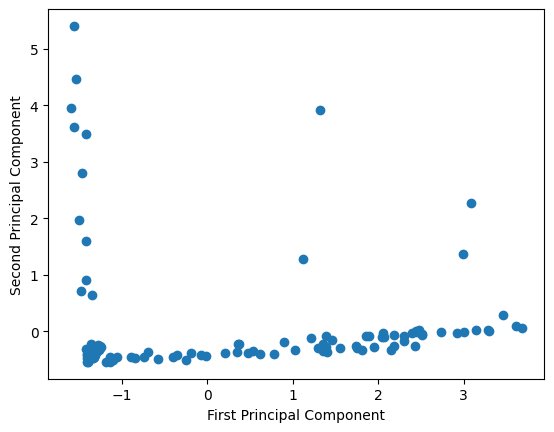

In [61]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

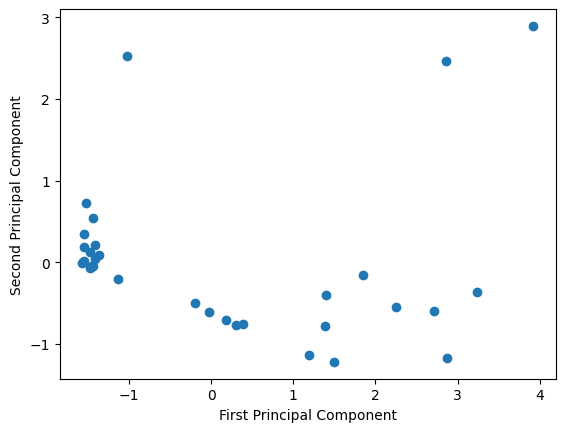

In [62]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [63]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [64]:
X_valid, X_test, y_valid, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=17)

In [65]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [66]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

GaussianNB
Train score of trained model: 60.0
Validation score of trained model: 60.18518518518518
Test score of trained model: 59.25925925925925
 
Confussion Matrix: 
[[10  4]
 [ 7  6]]

Accuracy : 0.5925925925925926
Precision: 0.6
Recall   : 0.46153846153846156
F1 score : 0.5217391304347826
Specificity : 0.7142857142857143

Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.71      0.65        14
           1       0.60      0.46      0.52        13

    accuracy                           0.59        27
   macro avg       0.59      0.59      0.58        27
weighted avg       0.59      0.59      0.59        27



############################################################################


BernoulliNB
Train score of trained model: 59.25925925925925
Validation score of trained model: 60.18518518518518
Test score of trained model: 55.55555555555556
 
Confussion Matrix: 
[[14  9]
 [ 3  1]]

Accuracy : 0.5555555555555556
Precisio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Nets
Train score of trained model: 86.66666666666667
Validation score of trained model: 86.11111111111111
Test score of trained model: 88.88888888888889
 
Confussion Matrix: 
[[14  0]
 [ 3 10]]

Accuracy : 0.8888888888888888
Precision: 1.0
Recall   : 0.7692307692307693
F1 score : 0.8695652173913044
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.77      0.87        13

    accuracy                           0.89        27
   macro avg       0.91      0.88      0.89        27
weighted avg       0.91      0.89      0.89        27



############################################################################




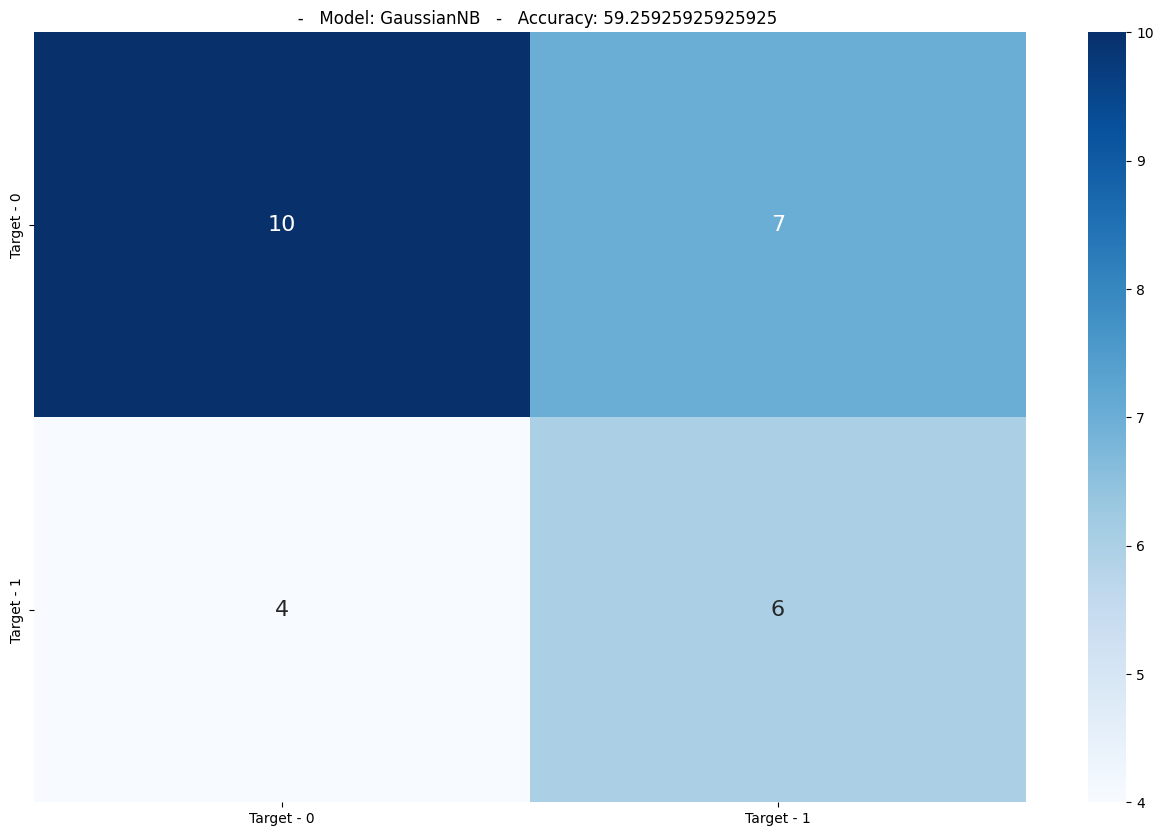

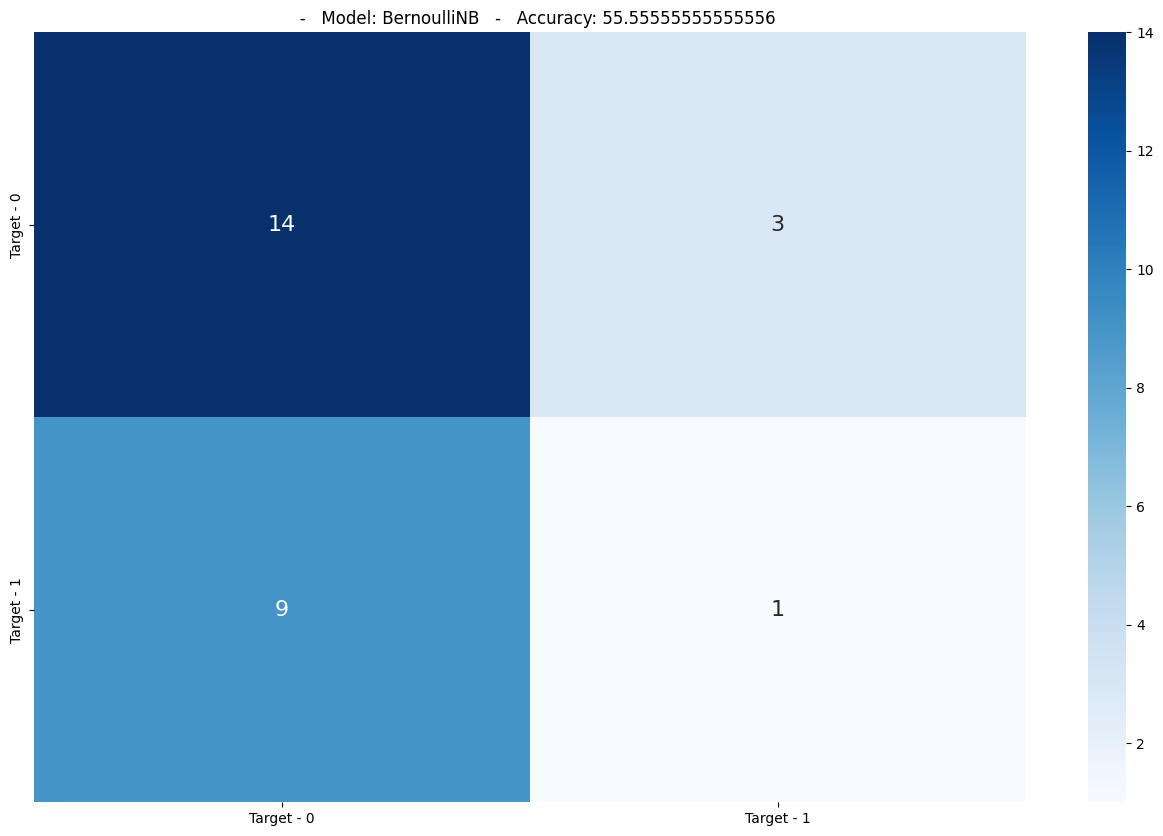

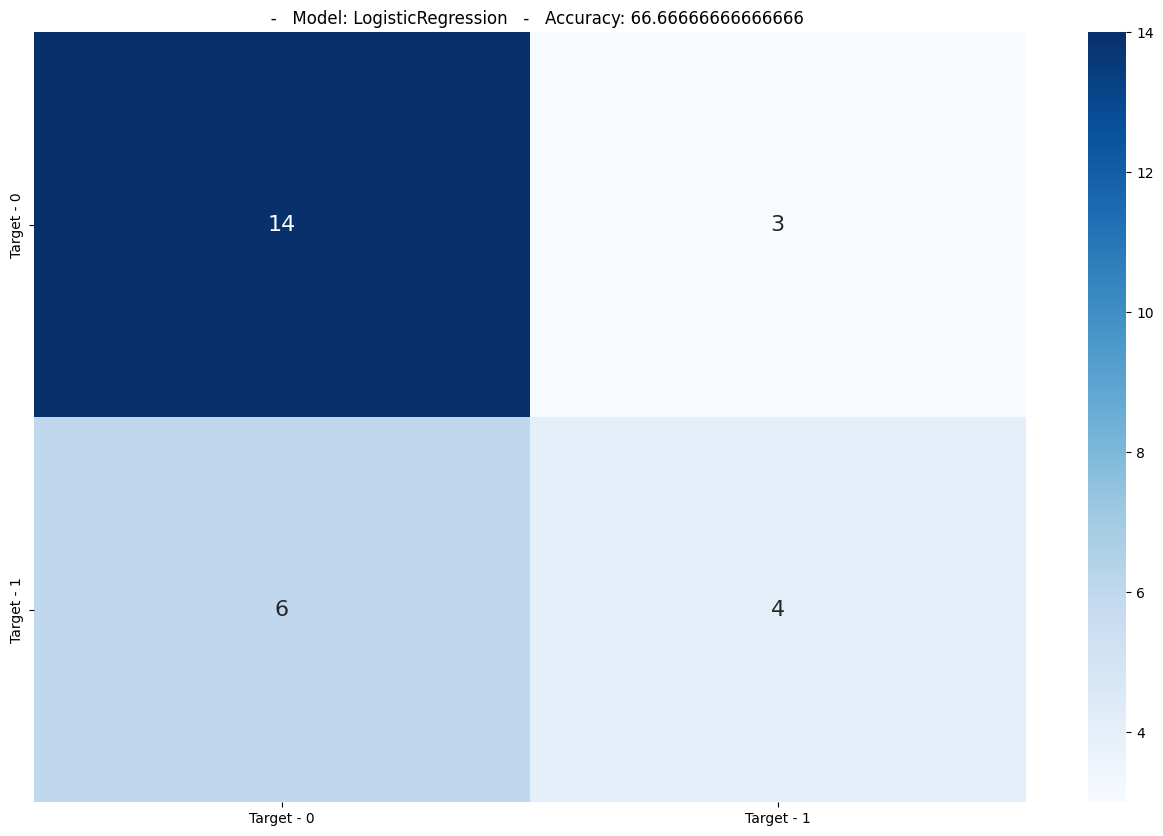

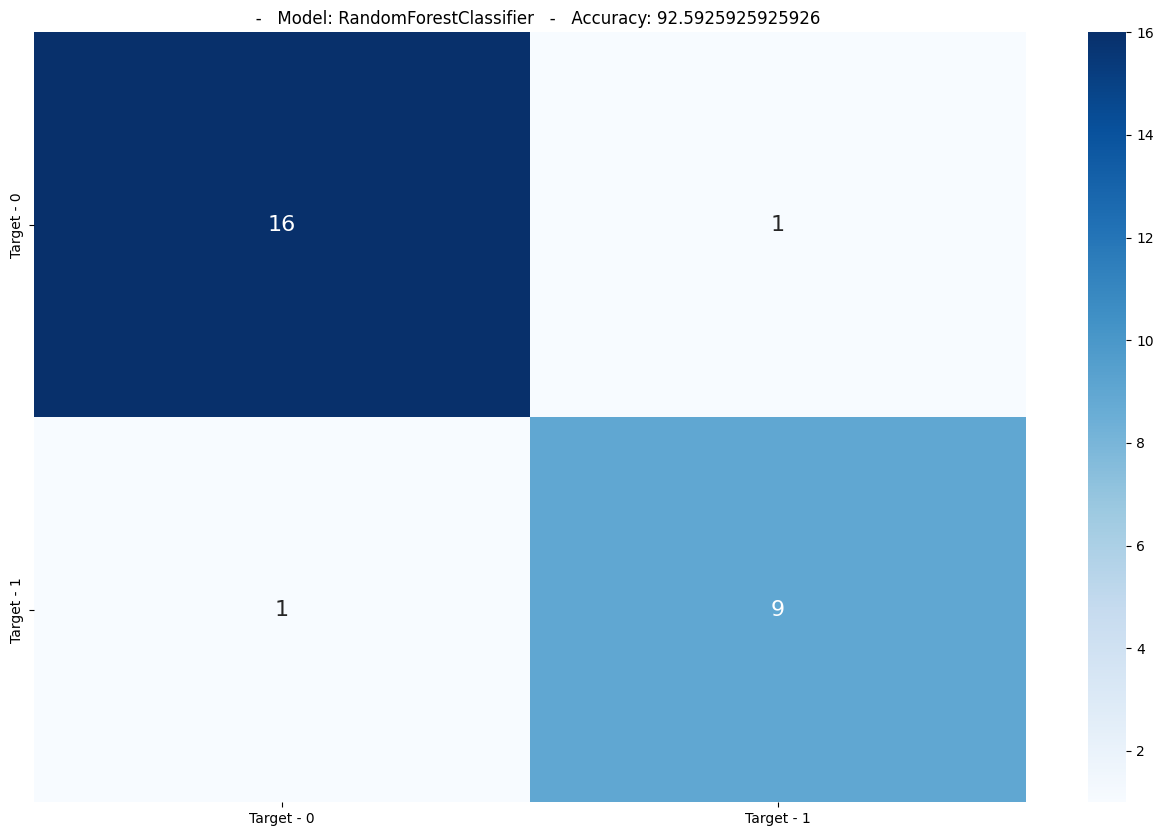

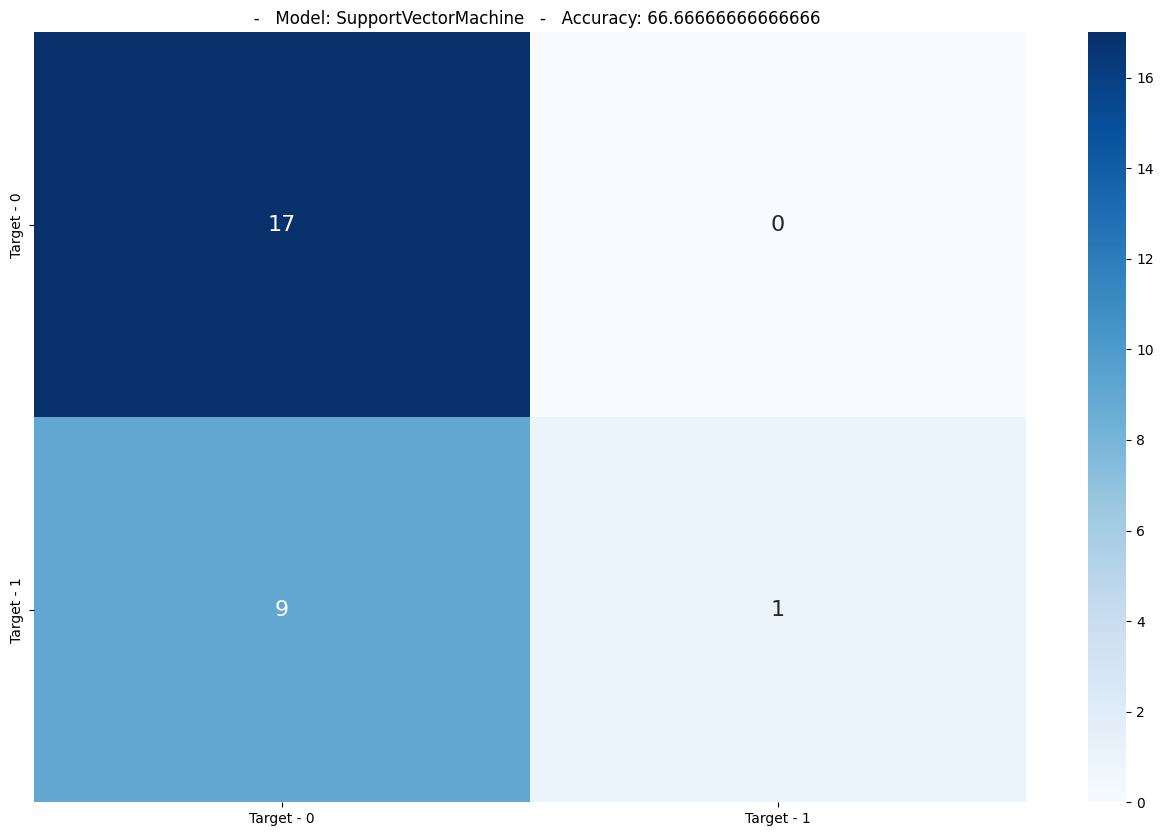

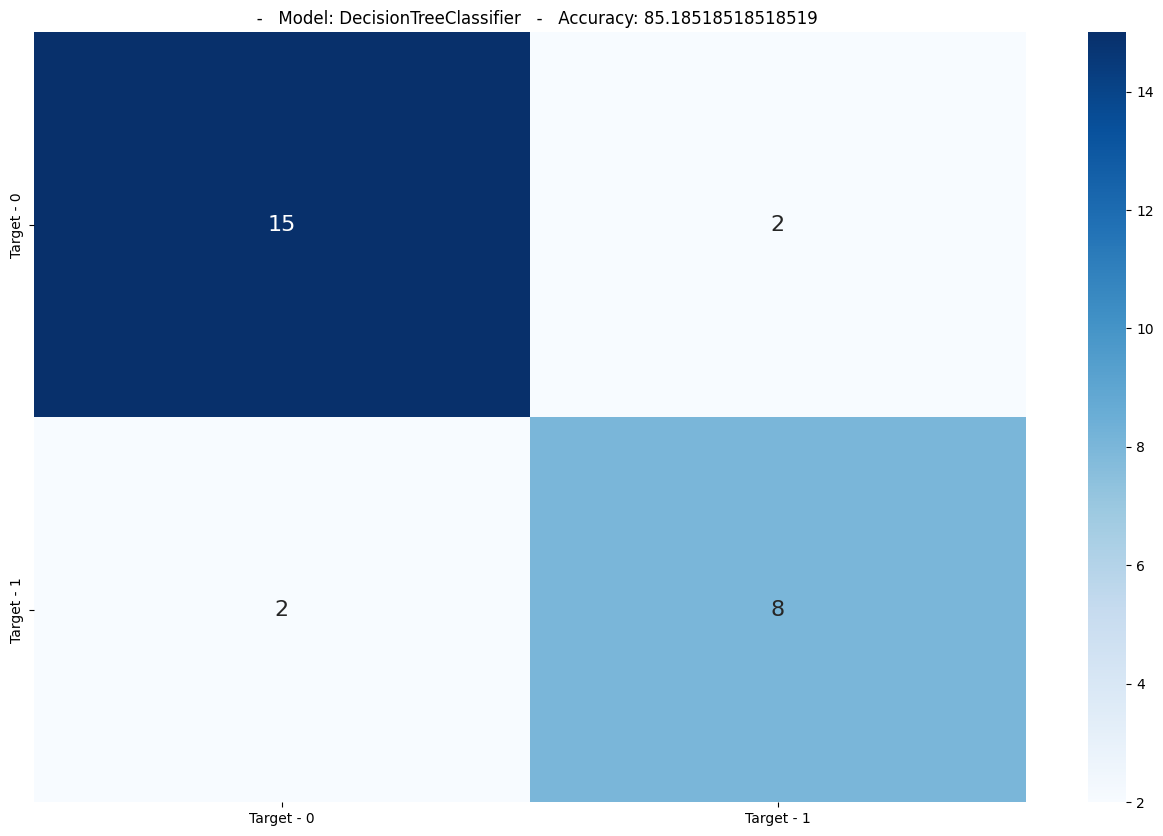

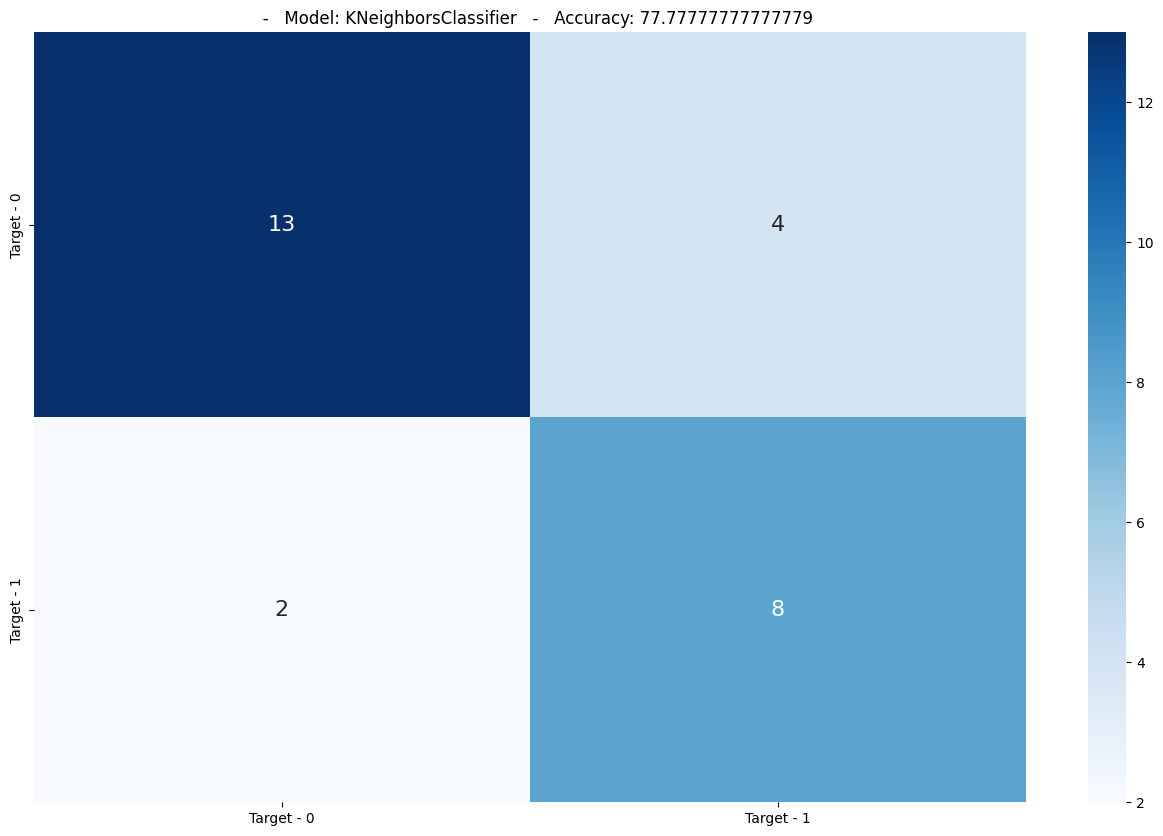

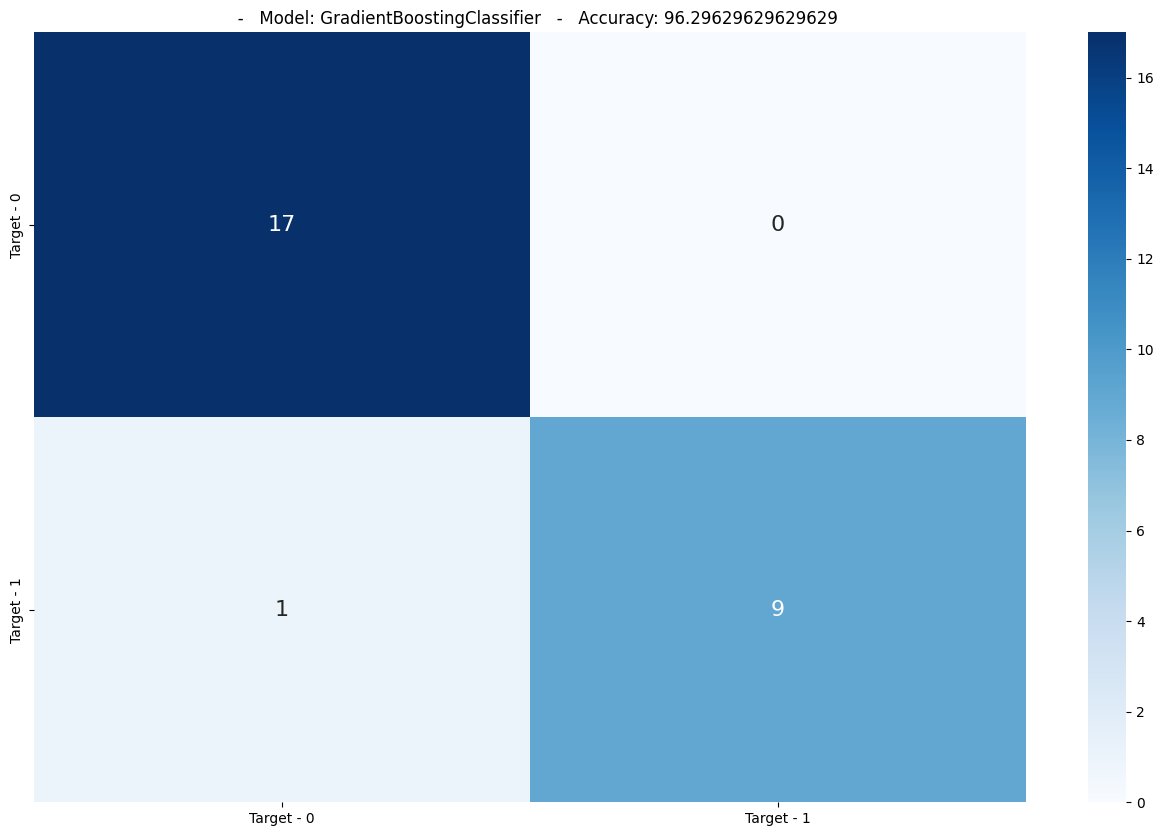

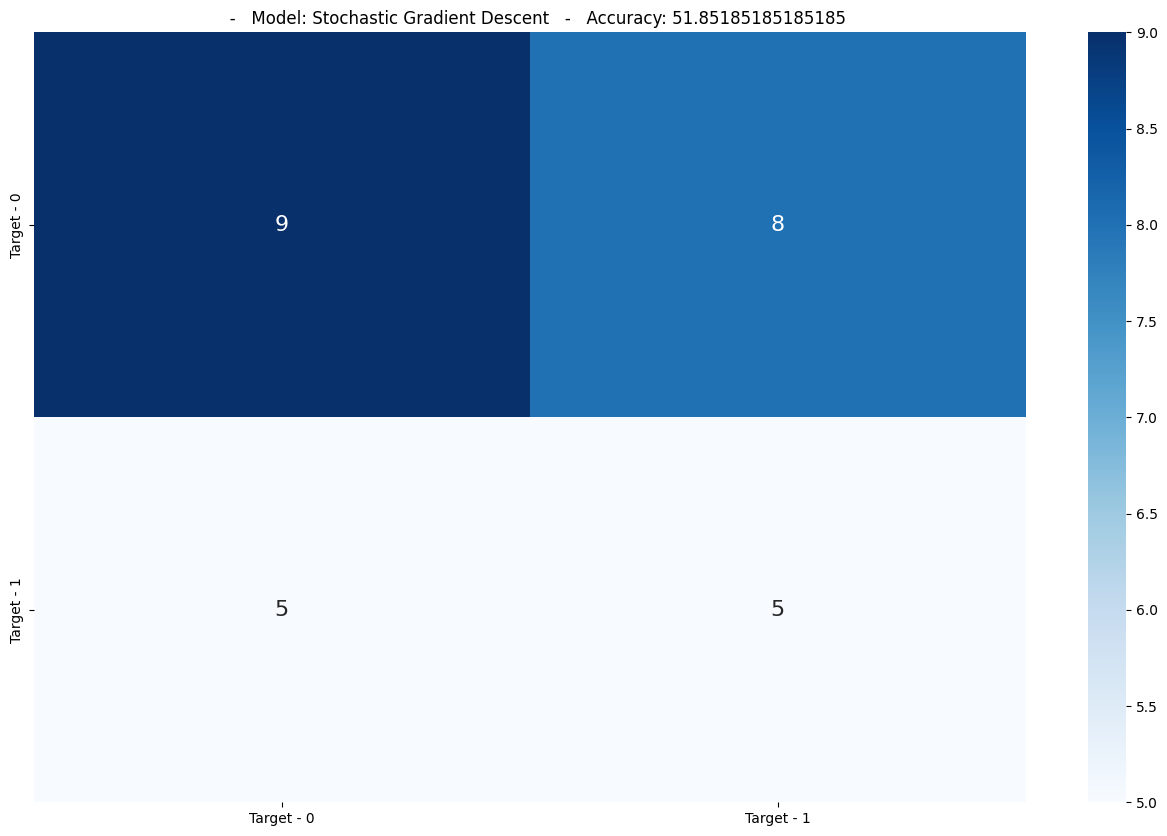

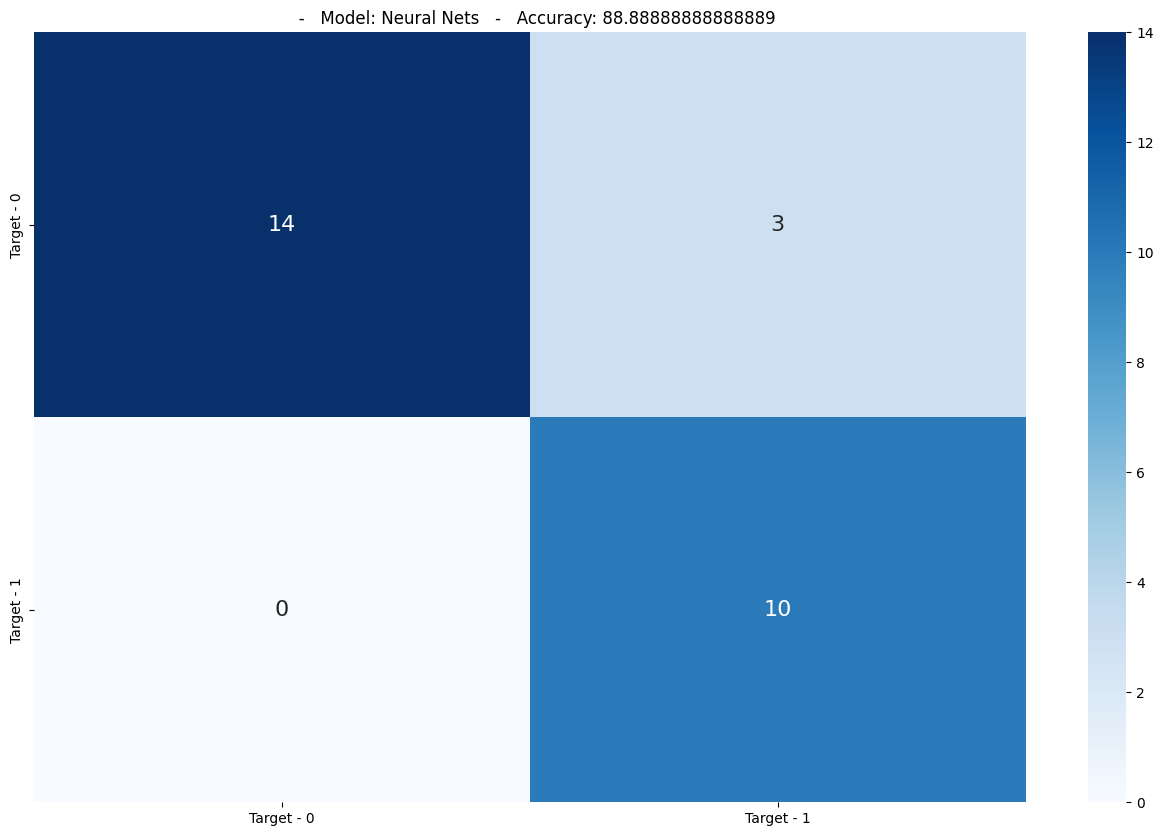

In [67]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=10, max_features=0.5, random_state=17, min_samples_split=15, min_samples_leaf=6),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=20, min_samples_split=10,min_samples_leaf=5),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=17),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=20),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(100,), random_state=10)
}

modelNames = ["GaussianNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')

  print(f'{m}')
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")

  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("")
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")

  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  plt.figure(figsize = (16,10))
  plt.title(f'   -   Model: {current}   -   Accuracy: {test_score*100}')
  sns.heatmap(confusion_matr, cmap="Blues", annot=True, annot_kws={"size": 16},
              xticklabels = ['Target - 0', 'Target - 1'],
             yticklabels=['Target - 0', 'Target - 1']);
  #plt.savefig(f'{current}.jpg')
  print("############################################################################")
  print("")
  print("")

In [68]:
modelNames = ["GaussianNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
for i in range(len(modelNames)):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i].round(3)}')

Accuracy of GaussianNB -----> 59.259
Accuracy of BernoulliNB -----> 55.556
Accuracy of LogisticRegression -----> 66.667
Accuracy of RandomForestClassifier -----> 92.593
Accuracy of SupportVectorMachine -----> 66.667
Accuracy of DecisionTreeClassifier -----> 85.185
Accuracy of KNeighborsClassifier -----> 77.778
Accuracy of GradientBoostingClassifier -----> 96.296
Accuracy of Stochastic Gradient Descent -----> 51.852
Accuracy of Neural Nets -----> 88.889


##Model predviđanje konačne ocjene

In [93]:
dfs_dict1 = pd.read_excel('/content/P12122 Ocjene - ISVU.xlsx', sheet_name='Sheet1')
dfs_dict2= pd.read_excel('/content/P12122 Ocjene - ISVU.xlsx', sheet_name='ponavljači')
odabrani_stupci = ['kolokvij1', 'kolokvij2', 'Konačna ocjena']
odabrani_stupci2=['Ponavljač\n1 da\n0 ne']
data2 = dfs_dict1[odabrani_stupci]
data2['Ponavaljac']=dfs_dict2[odabrani_stupci2]

<ipython-input-93-244cddbbb03a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Ponavaljac']=dfs_dict2[odabrani_stupci2]


In [94]:
data2['kolokvij1'] = data2['kolokvij1'].fillna(0)
data2['kolokvij2'] = data2['kolokvij2'].fillna(0)


<ipython-input-94-46580b9a544a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['kolokvij1'] = data2['kolokvij1'].fillna(0)
<ipython-input-94-46580b9a544a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['kolokvij2'] = data2['kolokvij2'].fillna(0)


In [95]:
data2['Broj polozenih testova']=data['Broj_polozenih_testova']
data2['Broj nepolozenih testova']=data['Broj_nepolozenih_testova']
data2['Spol']=data['Spol']

<ipython-input-95-47cbf6ba12eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Broj polozenih testova']=data['Broj_polozenih_testova']


In [96]:
data2.isna().sum()

kolokvij1                   0
kolokvij2                   0
Konačna ocjena              0
Ponavaljac                  0
Broj polozenih testova      0
Broj nepolozenih testova    0
Spol                        0
dtype: int64

In [97]:
data2.head()

,kolokvij1,kolokvij2,Konačna ocjena,Ponavaljac,Broj polozenih testova,Broj nepolozenih testova,Spol
0,50,100.0,4,0,24,13,1
1,0,0.0,1,1,0,38,1
2,2,0.0,1,0,14,23,1
3,50,100.0,4,0,17,20,0
4,50,35.0,2,1,16,21,0


In [98]:
data2.corr()

,kolokvij1,kolokvij2,Konačna ocjena,Ponavaljac,Broj polozenih testova,Broj nepolozenih testova,Spol
kolokvij1,1.000000,0.702920,0.666207,0.022547,0.019333,-0.019704,-0.025671
kolokvij2,0.702920,1.000000,0.693074,-0.102997,0.011919,-0.012450,-0.034495
Konačna ocjena,0.666207,0.693074,1.000000,-0.167147,0.032044,-0.037105,-0.019967
Ponavaljac,0.022547,-0.102997,-0.167147,1.000000,0.055299,-0.050401,-0.092603
Broj polozenih testova,0.019333,0.011919,0.032044,0.055299,1.000000,-0.998716,-0.186486
Broj nepolozenih testova,-0.019704,-0.012450,-0.037105,-0.050401,-0.998716,1.000000,0.186461
Spol,-0.025671,-0.034495,-0.019967,-0.092603,-0.186486,0.186461,1.000000


Broj studenata s ostvarenom ocjenom:
  1    71
2    41
3    28
4    16
5    10
Name: Konačna ocjena, dtype: int64


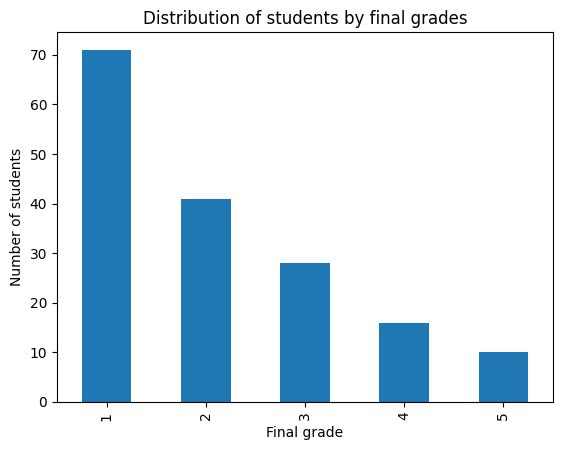

In [99]:
ocjene_counts = data2['Konačna ocjena'].value_counts()
print("Broj studenata s ostvarenom ocjenom:\n ", ocjene_counts)

ocjene_counts.plot(kind='bar')

plt.xlabel('Final grade')
plt.ylabel('Number of students')
plt.title('Distribution of students by final grades')

# Prikaz grafa
plt.show()


In [100]:
konacna_ocjena=data2['Konačna ocjena']
data2=data2.drop('Konačna ocjena',axis=1)
X_train,X_test,y_train,y_test=train_test_split(data2,konacna_ocjena,test_size=0.2, random_state=55)
X_valid, X_test, y_valid, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=55)

GaussianNB
Train score of trained model: 60.60606060606061
Validation score of trained model: 60.0
Test score of trained model: 62.96296296296296
 
Confussion Matrix: 
[[9 3 1 1 1]
 [0 3 0 0 0]
 [0 3 3 0 0]
 [0 0 1 1 0]
 [0 0 0 0 1]]

Accuracy : 0.8
Precision: 0.5
Recall   : 1.0
F1 score : 0.6666666666666666
Specificity : 0.75

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75        15
           2       0.33      1.00      0.50         3
           3       0.60      0.50      0.55         6
           4       0.50      0.50      0.50         2
           5       0.50      1.00      0.67         1

    accuracy                           0.63        27
   macro avg       0.59      0.72      0.59        27
weighted avg       0.78      0.63      0.66        27





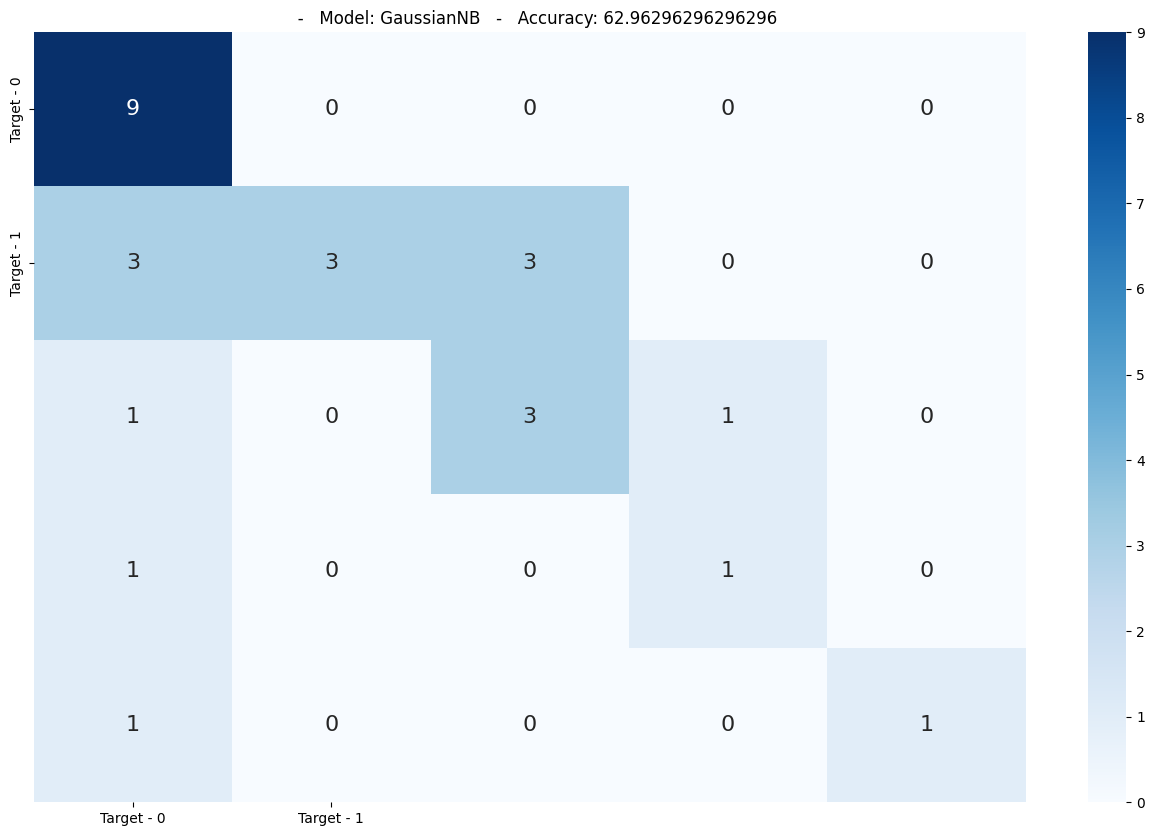

***************************************************************************


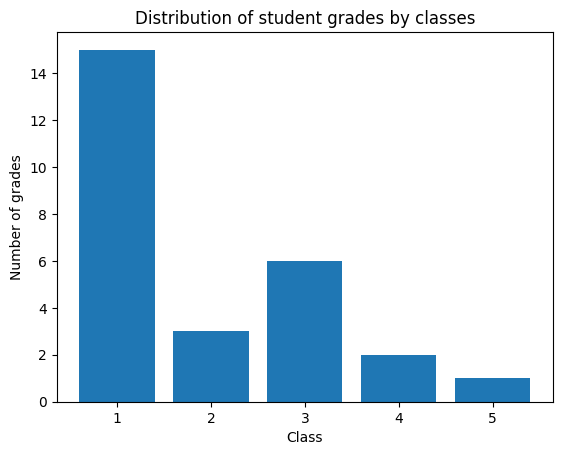

############################################################################

BernoulliNB
Train score of trained model: 56.81818181818182
Validation score of trained model: 56.19047619047619
Test score of trained model: 59.25925925925925
 
Confussion Matrix: 
[[8 4 1 1 1]
 [1 5 0 0 0]
 [0 0 2 0 0]
 [0 0 2 1 1]
 [0 0 0 0 0]]

Accuracy : 0.7222222222222222
Precision: 0.5555555555555556
Recall   : 0.8333333333333334
F1 score : 0.6666666666666667
Specificity : 0.6666666666666666

Classification Report: 
              precision    recall  f1-score   support

           1       0.89      0.53      0.67        15
           2       0.56      0.83      0.67         6
           3       0.40      1.00      0.57         2
           4       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         0

    accuracy                           0.59        27
   macro avg       0.47      0.52      0.45        27
weighted avg       0.72      0.59      0.61        27





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


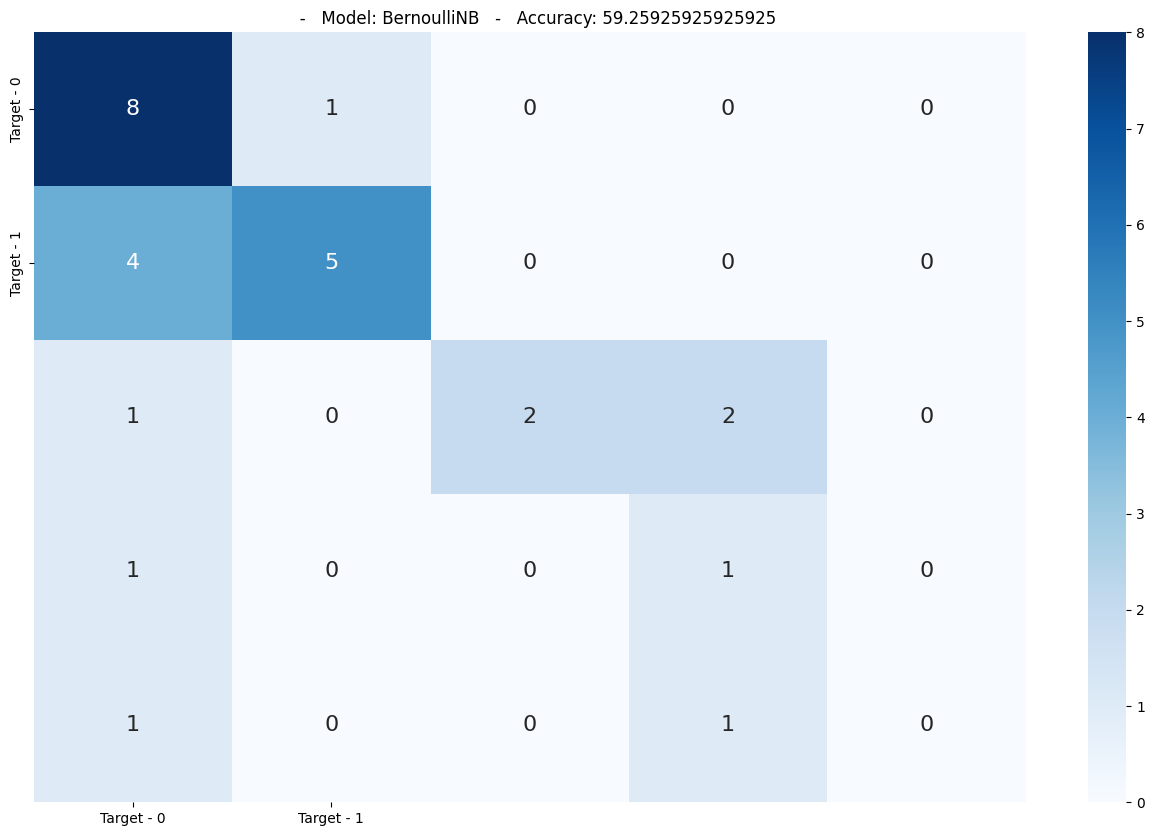

***************************************************************************


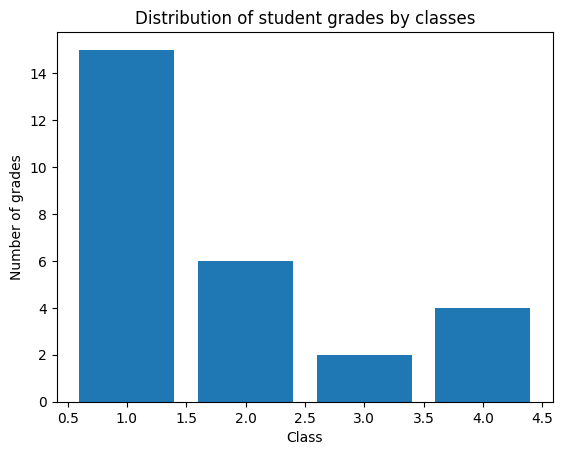

############################################################################

LogisticRegression
Train score of trained model: 60.60606060606061
Validation score of trained model: 60.952380952380956
Test score of trained model: 59.25925925925925
 
Confussion Matrix: 
[[9 4 1 1 1]
 [0 3 0 1 0]
 [0 2 3 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]

Accuracy : 0.75
Precision: 0.42857142857142855
Recall   : 1.0
F1 score : 0.6
Specificity : 0.6923076923076923

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.56      0.72        16
           2       0.33      0.75      0.46         4
           3       0.60      0.60      0.60         5
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1

    accuracy                           0.59        27
   macro avg       0.49      0.58      0.49        27
weighted avg       0.77      0.59      0.63        27





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


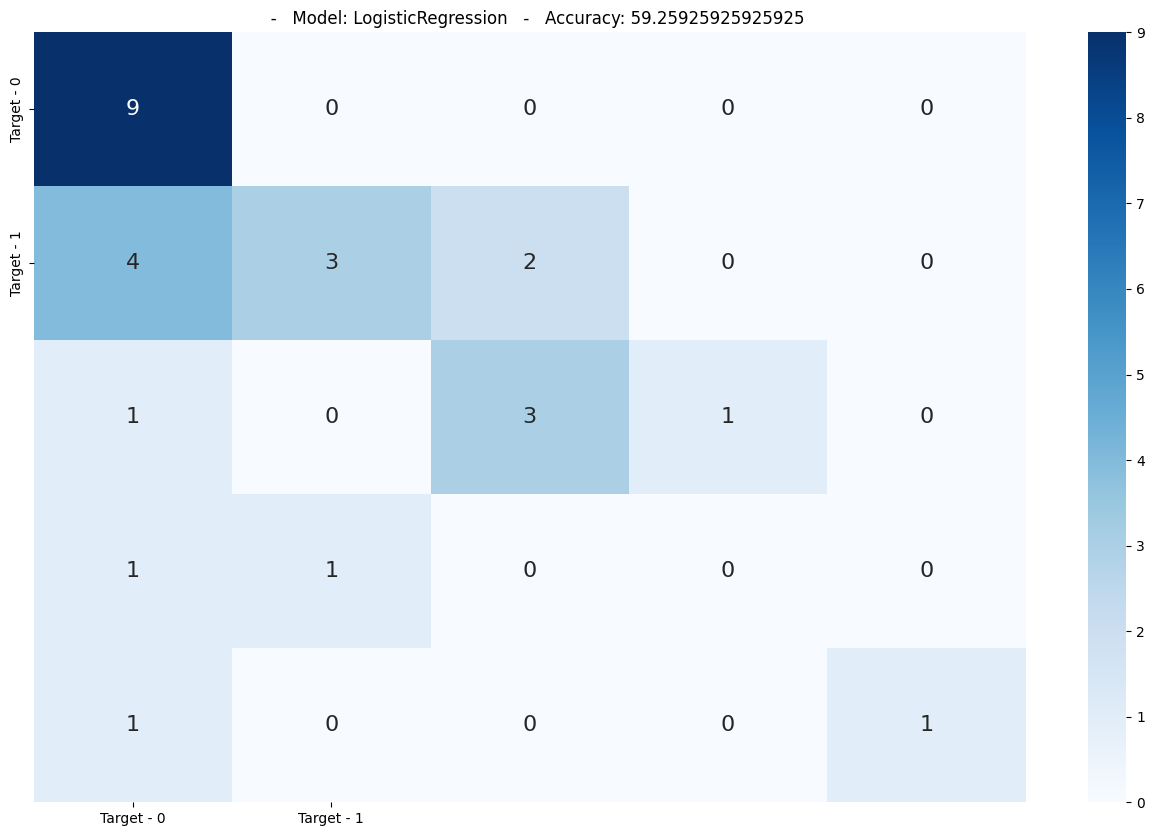

***************************************************************************


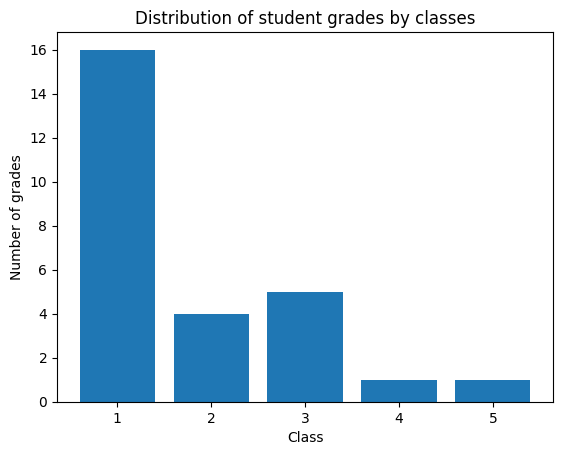

############################################################################

RandomForestClassifier
Train score of trained model: 97.72727272727273
Validation score of trained model: 99.04761904761905
Test score of trained model: 92.5925925925926
 
Confussion Matrix: 
[[9 0 1 0 0]
 [0 8 0 0 0]
 [0 0 4 0 0]
 [0 1 0 2 0]
 [0 0 0 0 2]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8
           3       0.80      1.00      0.89         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2

    accuracy                           0.93        27
   macro avg       0.94      0.91      0.92        27
weighted avg       0.94      0.93      0.92        27





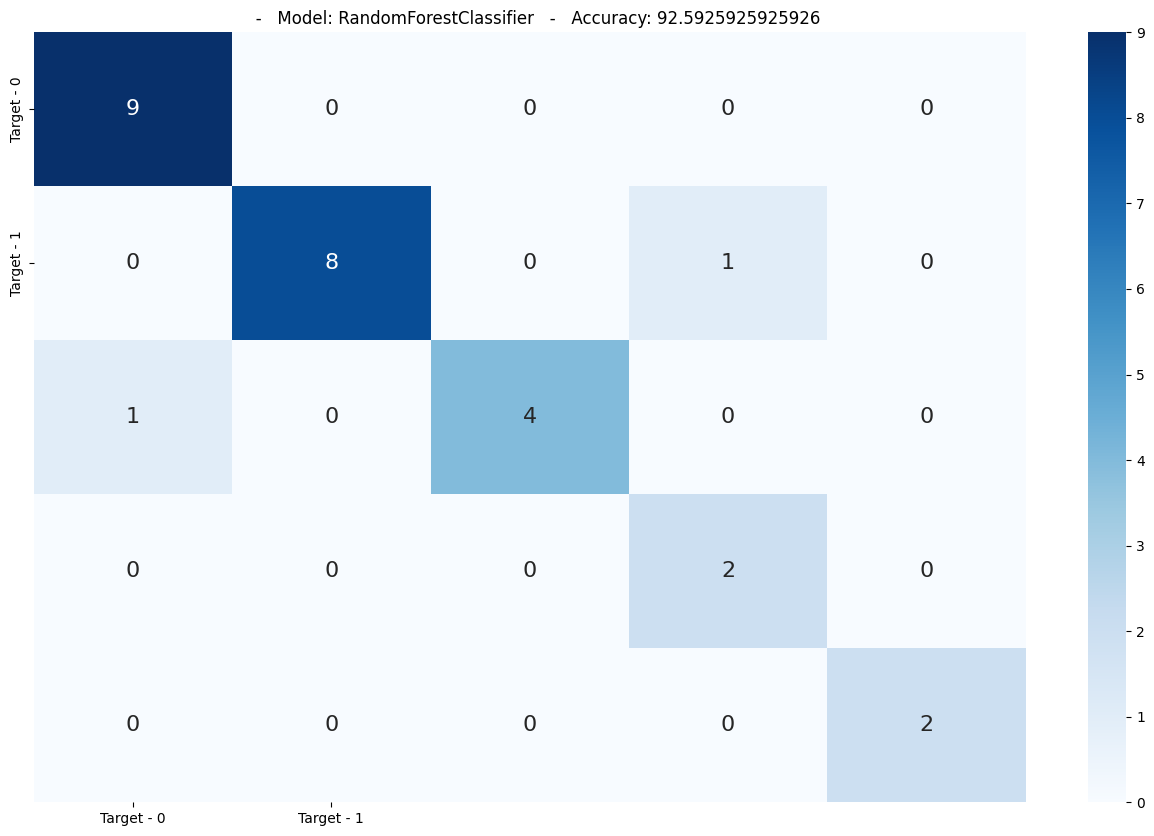

***************************************************************************


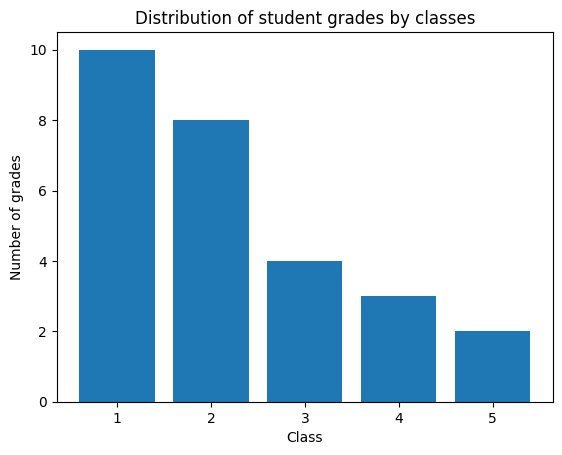

############################################################################

SupportVectorMachine
Train score of trained model: 65.15151515151516
Validation score of trained model: 67.61904761904762
Test score of trained model: 55.55555555555556
 
Confussion Matrix: 
[[9 4 1 1 1]
 [0 2 0 1 0]
 [0 3 3 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]

Accuracy : 0.7333333333333333
Precision: 0.3333333333333333
Recall   : 1.0
F1 score : 0.5
Specificity : 0.6923076923076923

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.56      0.72        16
           2       0.22      0.67      0.33         3
           3       0.60      0.50      0.55         6
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1

    accuracy                           0.56        27
   macro avg       0.46      0.55      0.45        27
weighted avg       0.77      0.56      0.61        27





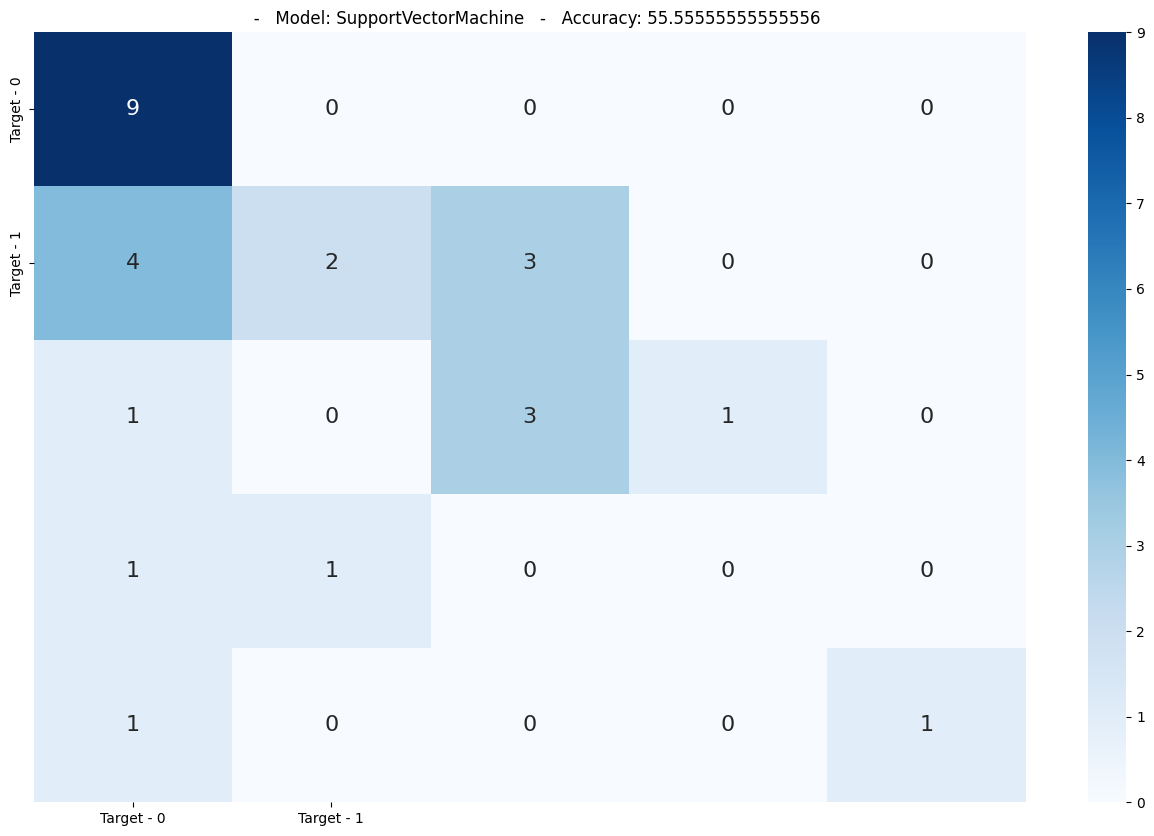

***************************************************************************


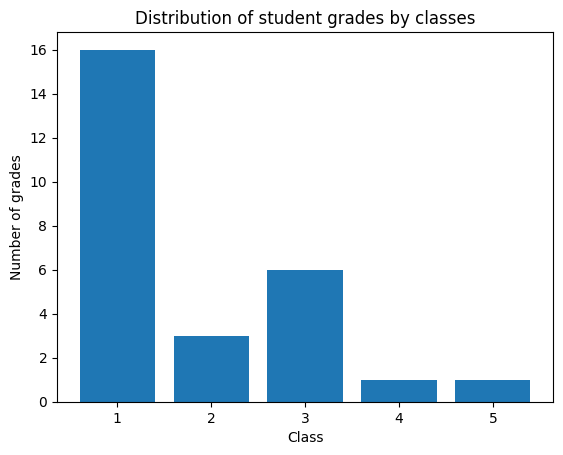

############################################################################

DecisionTreeClassifier
Train score of trained model: 97.72727272727273
Validation score of trained model: 99.04761904761905
Test score of trained model: 92.5925925925926
 
Confussion Matrix: 
[[9 0 1 0 0]
 [0 9 0 1 0]
 [0 0 4 0 0]
 [0 0 0 1 0]
 [0 0 0 0 2]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       1.00      0.90      0.95        10
           3       0.80      1.00      0.89         4
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         2

    accuracy                           0.93        27
   macro avg       0.86      0.96      0.89        27
weighted avg       0.95      0.93      0.93        27





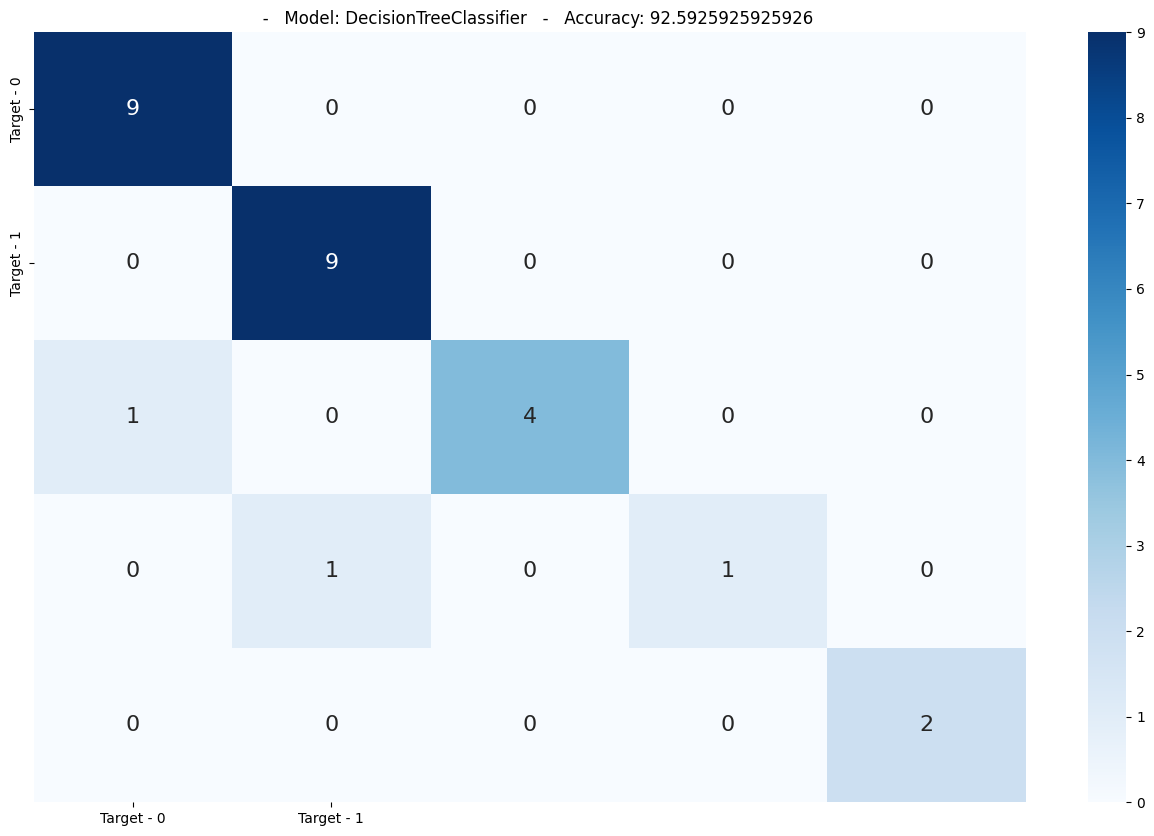

***************************************************************************


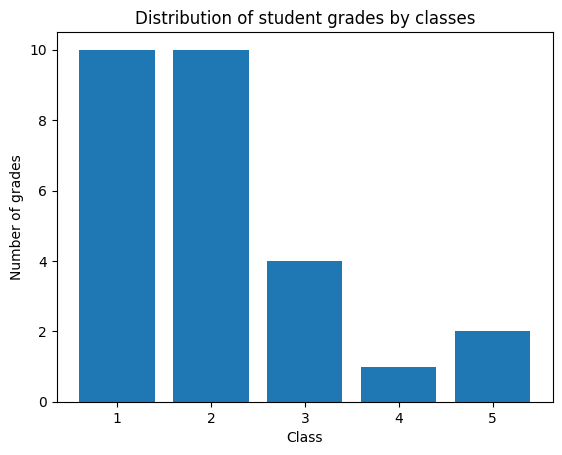

############################################################################

KNeighborsClassifier
Train score of trained model: 71.96969696969697
Validation score of trained model: 74.28571428571429
Test score of trained model: 62.96296296296296
 
Confussion Matrix: 
[[8 2 1 1 1]
 [1 5 0 1 0]
 [0 2 3 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]

Accuracy : 0.8125
Precision: 0.7142857142857143
Recall   : 0.8333333333333334
F1 score : 0.7692307692307692
Specificity : 0.8

Classification Report: 
              precision    recall  f1-score   support

           1       0.89      0.62      0.73        13
           2       0.56      0.71      0.63         7
           3       0.60      0.60      0.60         5
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1

    accuracy                           0.63        27
   macro avg       0.51      0.59      0.52        27
weighted avg       0.70      0.63      0.65        27





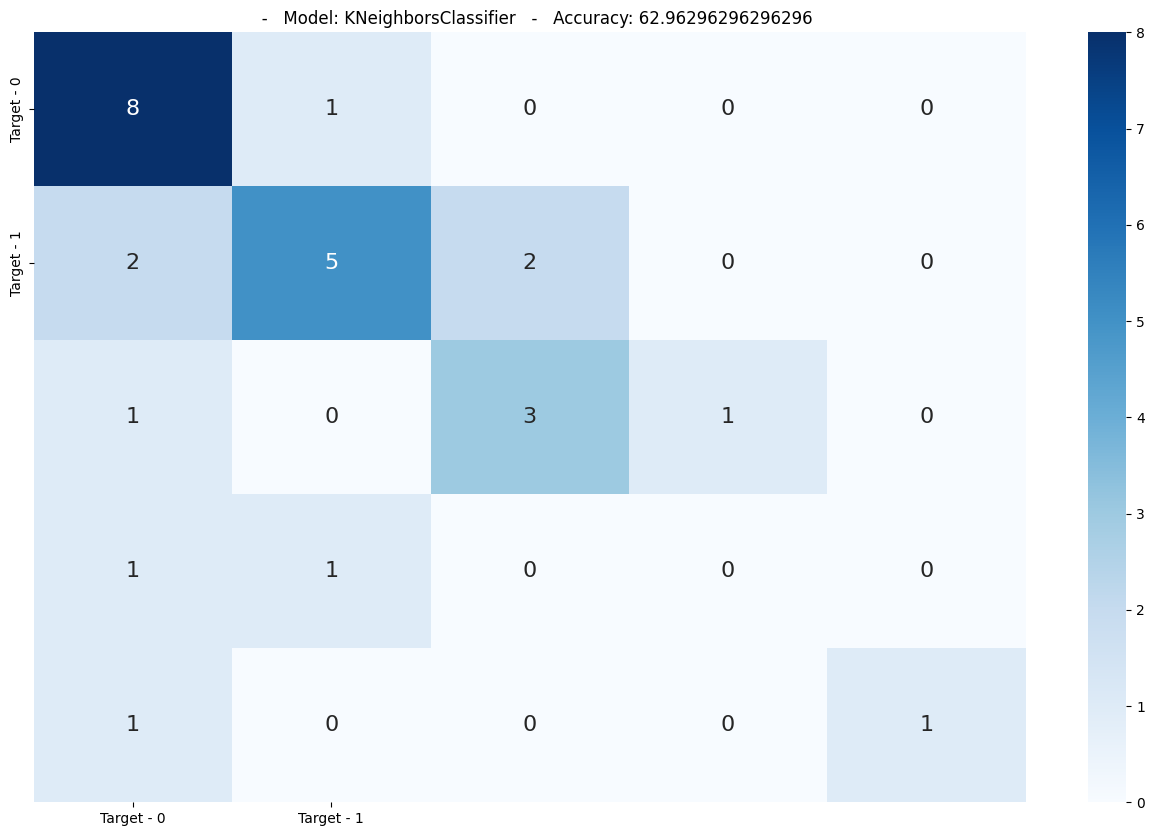

***************************************************************************


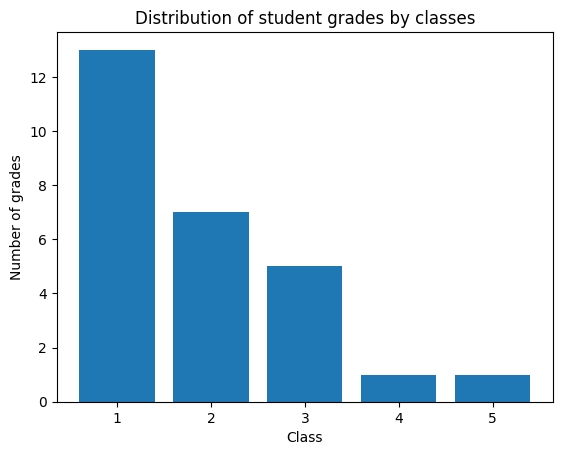

############################################################################

GradientBoostingClassifier
Train score of trained model: 96.96969696969697
Validation score of trained model: 98.09523809523809
Test score of trained model: 92.5925925925926
 
Confussion Matrix: 
[[9 0 1 0 0]
 [0 8 0 0 0]
 [0 0 4 0 0]
 [0 1 0 2 0]
 [0 0 0 0 2]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8
           3       0.80      1.00      0.89         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2

    accuracy                           0.93        27
   macro avg       0.94      0.91      0.92        27
weighted avg       0.94      0.93      0.92        27





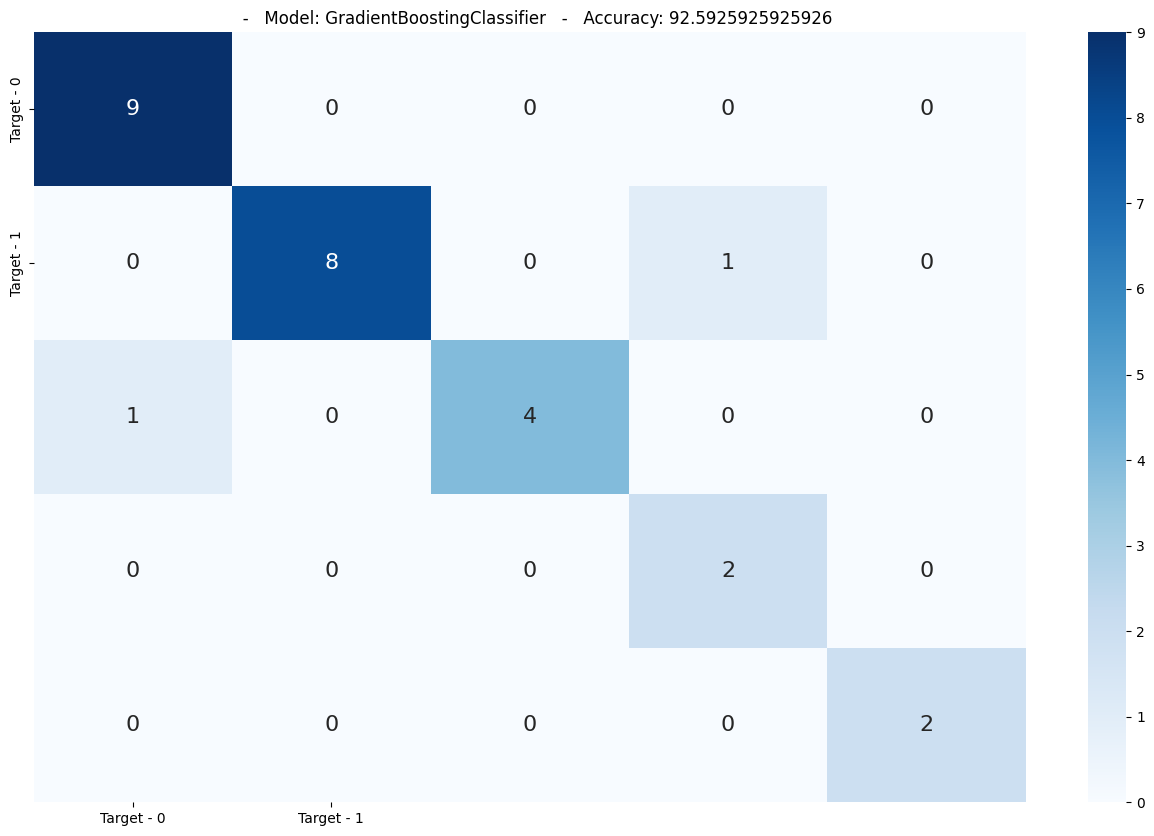

***************************************************************************


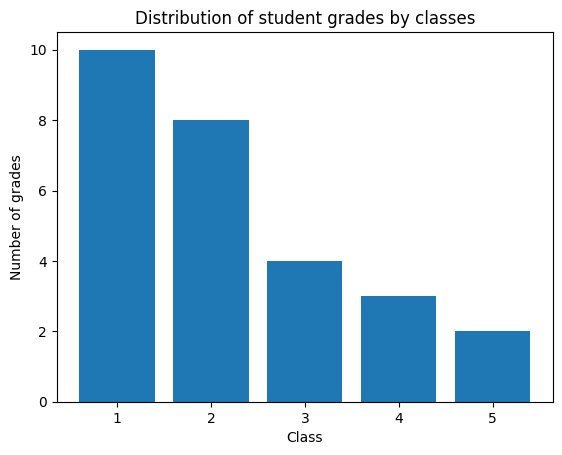

############################################################################

Stochastic Gradient Descent
Train score of trained model: 44.696969696969695
Validation score of trained model: 46.666666666666664
Test score of trained model: 37.03703703703704
 
Confussion Matrix: 
[[9 9 4 2 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 1]]

Accuracy : 0.5
Precision: 0.0
Recall   : nan
F1 score : nan
Specificity : 0.5

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.36      0.53        25
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.50      0.50      0.50         2

    accuracy                           0.37        27
   macro avg       0.30      0.17      0.21        27
weighted avg       0.96      0.37      0.53        27





<ipython-input-107-f6dd612385f3>:56: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

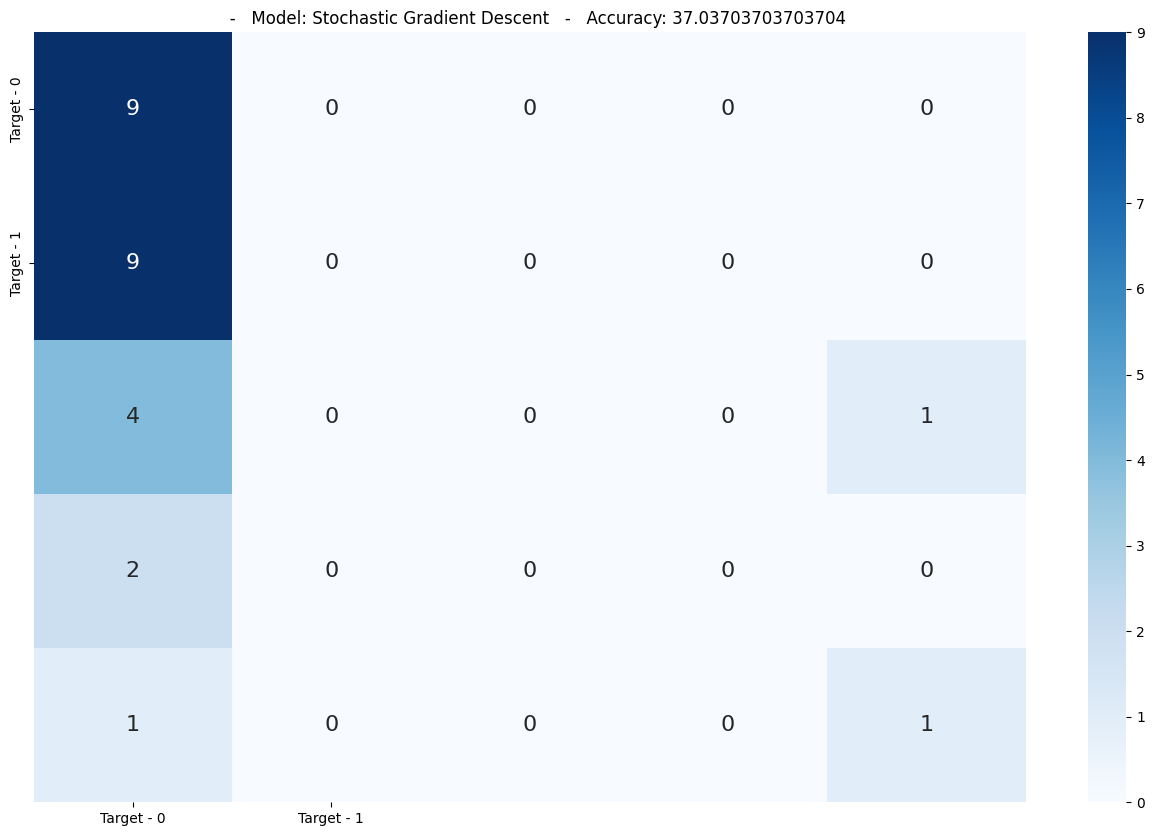

***************************************************************************


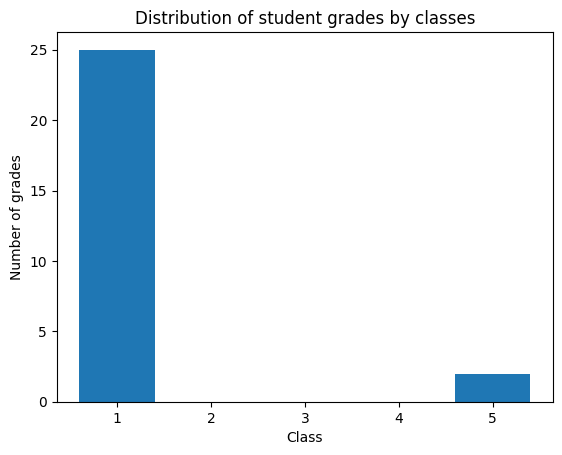

############################################################################



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Nets
Train score of trained model: 76.51515151515152
Validation score of trained model: 77.14285714285715
Test score of trained model: 74.07407407407408
 
Confussion Matrix: 
[[9 3 1 1 1]
 [0 5 0 0 0]
 [0 0 4 0 0]
 [0 1 0 1 0]
 [0 0 0 0 1]]

Accuracy : 0.8235294117647058
Precision: 0.625
Recall   : 1.0
F1 score : 0.7692307692307693
Specificity : 0.75

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75        15
           2       0.56      1.00      0.71         5
           3       0.80      1.00      0.89         4
           4       0.50      0.50      0.50         2
           5       0.50      1.00      0.67         1

    accuracy                           0.74        27
   macro avg       0.67      0.82      0.70        27
weighted avg       0.83      0.74      0.74        27





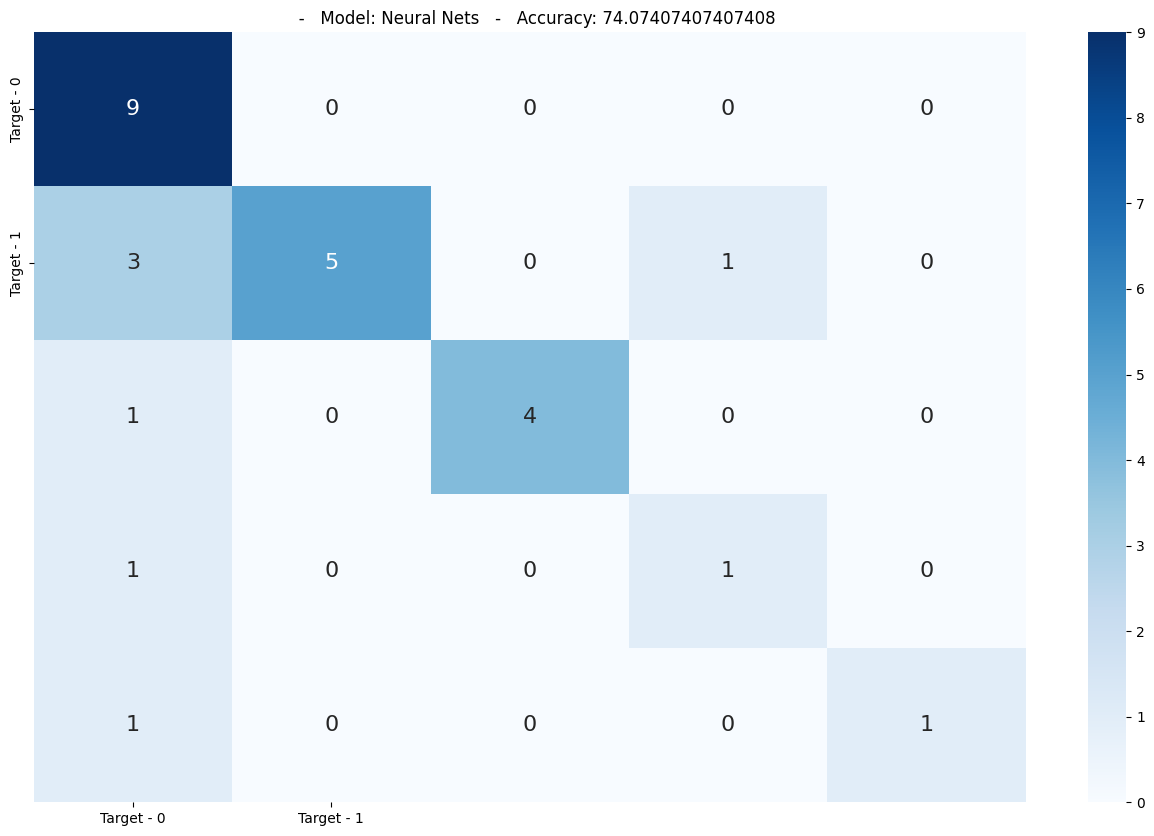

***************************************************************************


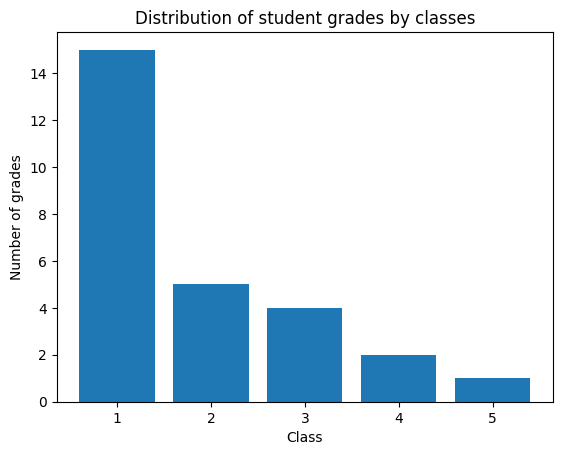

############################################################################



In [107]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(random_state=60),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(), # Adjust the maximum depth of the tree
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),

    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=17)
}

modelNames = ["GaussianNB", 'BernoulliNB', 'LogisticRegression', 'RandomForestClassifier', 'SupportVectorMachine',
              'DecisionTreeClassifier', 'KNeighborsClassifier', 'GradientBoostingClassifier',
              'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)

    print(f'{m}')
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

    validation_score = model.score(X_valid, y_valid)
    print(f'Validation score of trained model: {validation_score*100}')
    validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")

    y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)

    print(f'Confussion Matrix: \n{conf_matrix}\n')

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, y_test)

    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    tp = conf_matrix[1, 1]
    fn = conf_matrix[1, 0]
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1score = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("")
    print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
    print("")

    current = m

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds)
    plt.figure(figsize=(16, 10))
    plt.title(f'   -   Model: {current}   -   Accuracy: {test_score*100}')
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, annot_kws={"size": 16},
                xticklabels=['Target - 0', 'Target - 1'],
                yticklabels=['Target - 0', 'Target - 1'])
    plt.show()
    print("***************************************************************************")

    y_pred_series = pd.Series(y_predictions)

    # Izračunajte raspodjelu ocjena po klasama
    class_distribution = y_pred_series.value_counts().sort_index()

    # Prikaz raspodjele ocjena
    plt.bar(class_distribution.index, class_distribution.values)

    # Dodajte oznake osi i naslov
    plt.xlabel('Class')
    plt.ylabel('Number of grades')
    plt.title('Distribution of student grades by classes')

    # Prikaz grafa
    plt.show()
    print("############################################################################")
    print("")


In [108]:
for i in range(len(modelNames)):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i].round(3)}')

Accuracy of GaussianNB -----> 62.963
Accuracy of BernoulliNB -----> 59.259
Accuracy of LogisticRegression -----> 59.259
Accuracy of RandomForestClassifier -----> 92.593
Accuracy of SupportVectorMachine -----> 55.556
Accuracy of DecisionTreeClassifier -----> 92.593
Accuracy of KNeighborsClassifier -----> 62.963
Accuracy of GradientBoostingClassifier -----> 92.593
Accuracy of Stochastic Gradient Descent -----> 37.037
Accuracy of Neural Nets -----> 74.074


In [103]:
from sklearn import tree

model = RandomForestClassifier(random_state=17)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
najznacajnije_varijable = X_train.columns[sorted_indices[:4]]
najznacajnije_varijable = najznacajnije_varijable[::-1]

X_selected = X_train[najznacajnije_varijable]

model_selected = RandomForestClassifier(random_state=17)
model_selected.fit(X_selected, y_train)


fig = plt.figure(figsize=(150, 50))
_ = tree.plot_tree(model_selected.estimators_[0], feature_names=najznacajnije_varijable, filled=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Index(['kolokvij1', 'kolokvij2', 'Broj nepolozenih testova',
       'Broj polozenih testova'],
      dtype='object')


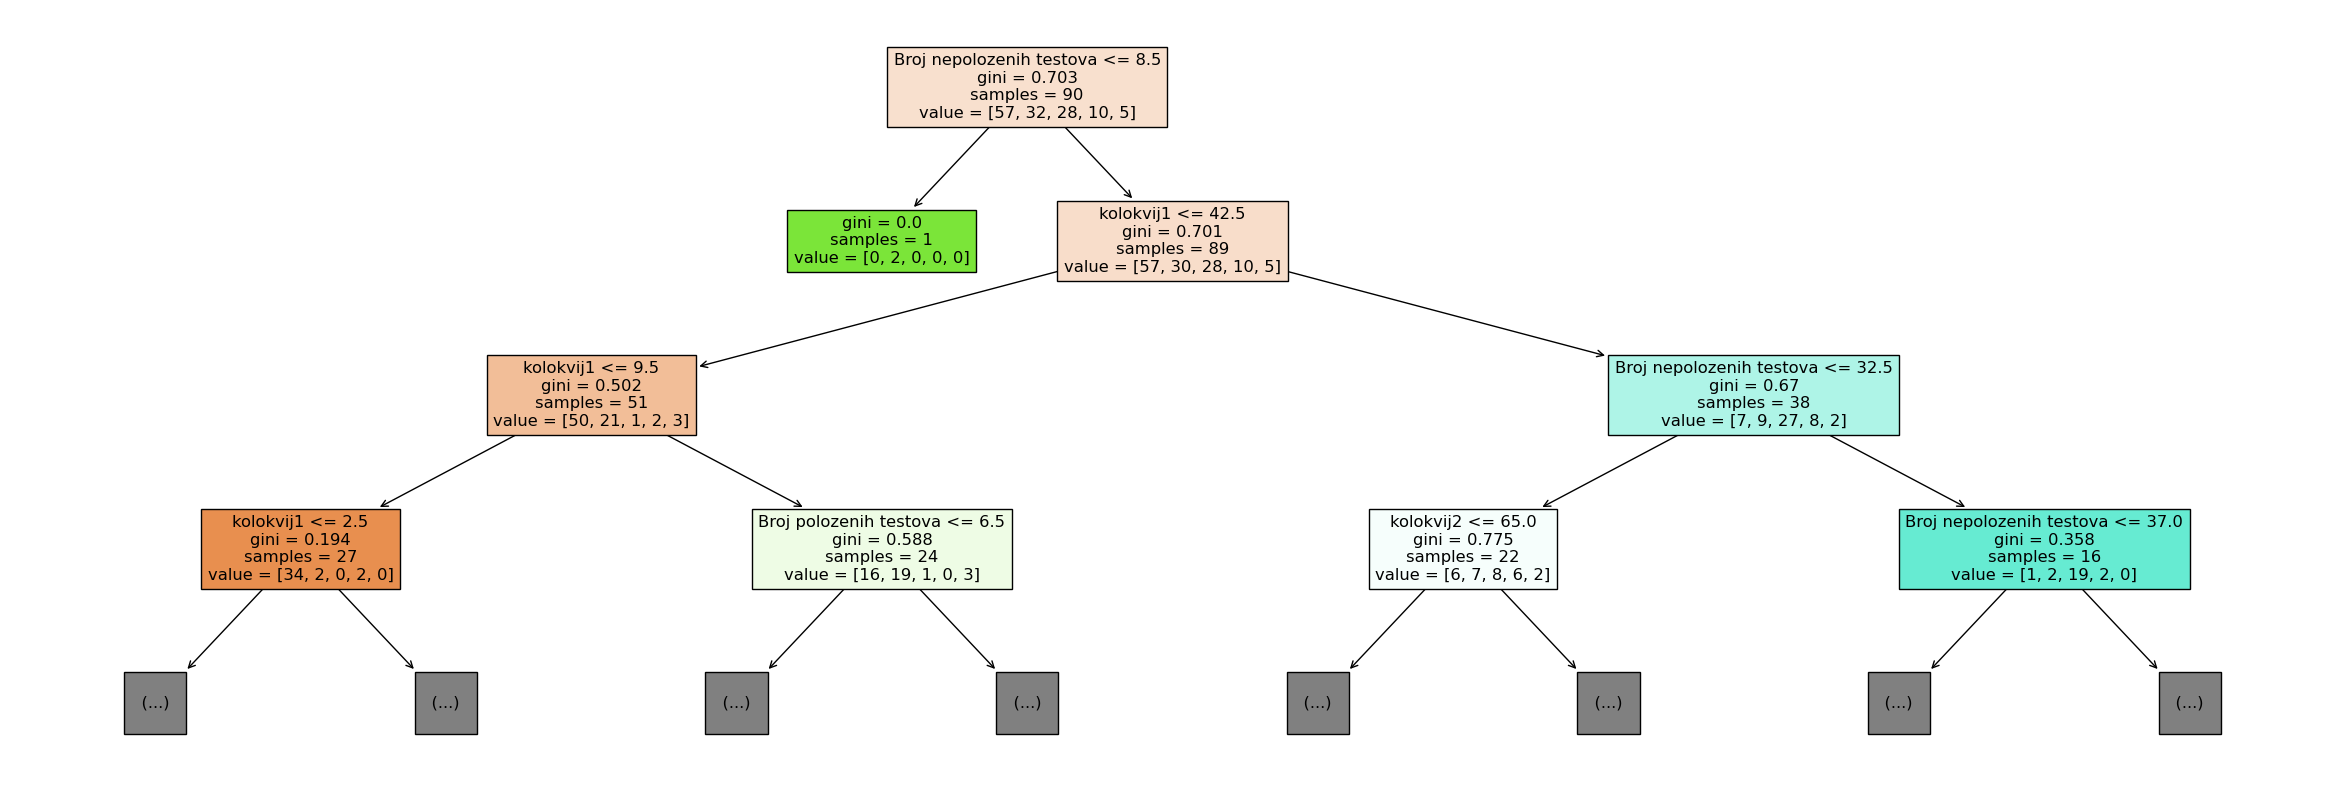

In [104]:
model = RandomForestClassifier(random_state=17)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
najznacajnije_varijable = X_train.columns[sorted_indices[:4]]
print(najznacajnije_varijable)
najznacajnije_varijable = najznacajnije_varijable[::-1]


X_selected = X_train[najznacajnije_varijable]

model_selected = RandomForestClassifier(random_state=17)
model_selected.fit(X_selected, y_train)


fig = plt.figure(figsize=(30, 10))
_ = tree.plot_tree(model_selected.estimators_[0], feature_names=najznacajnije_varijable, filled=True, max_depth=3)
plt.show()
